# **DANAMON Q4 INSTAGRAM PERFORMANCE RESEARCH**

## **Business Understanding**

**Context**

Bank Danamon is one of Indonesia's leading banks, actively using social media to engage with customers and promote its financial services. In the rapidly evolving digital era, Bank Danamon leverages various digital channels, including Instagram, as one of the primary platforms to connect with its customers. With over 130,000 followers in 2024, Bank Danamon utilizes Instagram to build brand awareness, promote products and services, and enhance customer engagement through relevant, informative, and inspiring content.

**Stakeholders**
- Digital Marketing and Communications Team: Responsible for managing content, social media strategies, and achieving Key Performance Indicators (KPIs).
- Bank Danamon Senior Management: Requires comprehensive reports to evaluate the effectiveness of digital marketing investments.

**Problem Statements**
- How is Bank Danamon's Instagram performance during Q4 2024 (October-December)? Engagement = (Sum of Likes + Sum Of Customer Comments)/Average Followers
- What type of content generated the highest engagement during this period?

**Goals**
- Evaluate the performance of Bank Danamon’s Instagram content during Q4 2024.
- Identify user engagement trends based on key metrics such as likes and comments.
- Provide data-driven recommendations to enhance Instagram marketing strategies for the next quarter.


## **Data Understanding**

- The Post dataset is collected by Bank Danamon's Instagram Scraping with username *@mydanamon*
- The Followers gained dataset is from _Social Blade_
    - Time range: **1 January 2024 to 13 December 2024 at 2 p.m**
    - Total followers : **131880**


In [136]:
# Library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [137]:
df_post = pd.read_csv('instagram_performance_danamon_2024_20241214_141707.csv')
df_followers = pd.read_csv('followers_gained.csv')

display(df_post.head(),df_followers)

Likes  Comments  Shares  Saves  \
0     73         8    2978      0   
1     29         4       0      0   
2    149         7       0      0   
3    164        19       0      0   
4     30        16       0      0   

                                             Caption  \
0  Kalian tim orang tua yang lagi nyiapin pendidi...   
1  Waspada penipuan informasi seputar kenaikan li...   
2  Danamon berkolaborasi dengan Indo Premier Inve...   
3  Danamon kembali raih penghargaan bergengsi pad...   
4  Transfer ke mitra bisnis di luar negeri tinggi...   

                                      Link            Timestamp media_type  \
0  https://www.instagram.com/p/DDg7AjwBnvq  2024-12-13 10:00:34      VIDEO   
1  https://www.instagram.com/p/DDgYrAos6qt  2024-12-13 05:00:11      IMAGE   
2  https://www.instagram.com/p/DDeqzpjMKJj  2024-12-12 13:00:12      IMAGE   
3  https://www.instagram.com/p/DDb_Iq1sq2F  2024-12-11 12:00:09      IMAGE   
4  https://www.instagram.com/p/DDZFvbRuxIr  2024-12-10 09:00:08      IMAGE   

                                           media_url  Followers  
0  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....     131899  
1  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....     131899  
2  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....     131899  
3  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....     131899  
4  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....     131899

Date  Followers Gained
0     January 2024               113
1    February 2024              1442
2       March 2024              1457
3       April 2024               406
4         May 2024               308
5        June 2024              4120
6        July 2024               -71
7      August 2024              -239
8   September 2024               583
9     October 2024               131
10   November 2024               258
11   December 2024               127

Here is the explanation of each features in df_post dataset:
- `Likes`: The number of likes received by a specific post. This reflects the initial level of appreciation or approval from the audience.
- `Comments`: The total number of comments made on a post. This represents deeper engagement as it requires users to interact actively with the content.
- `Shares`: The number of times a post was shared by users. Shares indicate the content's relevance and value, as users are willing to distribute it within their own networks.
- `Saves` : The number of times users saved the post for later reference. This suggests that the content was found useful or worth revisiting.
- `Caption`: The text or description accompanying a post, usually providing context, a call to action, or additional information about the content. 
- `Link`: URL associated with the post. This might direct users to a website, product page, or campaign landing page.
- `Timestamp`: The date and time the post was published. This helps analyze trends related to timing, such as the best time to post for higher engagement.
- `media_type`: The type of content shared, such as image, video, or carousel. This indicates the format of the post.
- `media_url`: The direct link to the media content (image or video) shared in the post. This serves as a reference to the actual content.
- `Followers`: The number of followers at the time of the post. This provides context for the engagement metrics relative to the audience size.

Here is the explanation of each features in df_followers dataset:
- `Date`: The month of date.
- `Followers Gained`: Total followers gained from January 2024 to December 2024 (December 13th, 2024). 

In [138]:
df_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Likes       504 non-null    int64 
 1   Comments    504 non-null    int64 
 2   Shares      504 non-null    int64 
 3   Saves       504 non-null    int64 
 4   Caption     504 non-null    object
 5   Link        504 non-null    object
 6   Timestamp   504 non-null    object
 7   media_type  504 non-null    object
 8   media_url   504 non-null    object
 9   Followers   504 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 39.5+ KB


This `df_post` dataset has **504** rows

In [139]:
df_followers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              12 non-null     object
 1   Followers Gained  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


This `df_followers` has 12 rows

## **Data Cleaning**

We need to create function to analyze overall demographics.

In [140]:
def analyze_features(df):
    # Create empty lists to store results
    feature_names = []
    missing_values = []
    missing_percentages = []
    unique_samples = []
    total_unique = []
    
    # Calculate metrics for each column
    for col in df.columns:
        # Get feature name
        feature_names.append(col)
        
        # Get missing value count
        missing = df[col].isnull().sum()
        missing_values.append(missing)
        
        # Calculate missing percentage
        missing_pct = (missing / len(df)) * 100
        missing_percentages.append(f"{missing_pct:.2f}%")
        
        # Get total unique count
        total_unique.append(len(df[col].unique()))
        
        # Get 5 unique samples
        unique_vals = df[col].unique()
        samples = unique_vals[:5] if len(unique_vals) >= 5 else unique_vals
        unique_samples.append(samples)
    
    # Create results dataframe
    results = pd.DataFrame({
        'Feature': feature_names,
        'Missing Values': missing_values,
        'Missing Percentage': missing_percentages,
        'Total Unique Values': total_unique,
        'Sample Unique Values': unique_samples
    })
    
    return results

### **df_post**

#### **Missing Values**

In [141]:
df_post_feature_analysis = analyze_features(df_post)

df_post_feature_analysis

Feature  Missing Values Missing Percentage  Total Unique Values  \
0       Likes               0              0.00%                  212   
1    Comments               0              0.00%                   52   
2      Shares               0              0.00%                  158   
3       Saves               0              0.00%                    1   
4     Caption               0              0.00%                  504   
5        Link               0              0.00%                  504   
6   Timestamp               0              0.00%                  504   
7  media_type               0              0.00%                    2   
8   media_url               0              0.00%                  504   
9   Followers               0              0.00%                    1   

                                Sample Unique Values  
0                             [73, 29, 149, 164, 30]  
1                                  [8, 4, 7, 19, 16]  
2                           [2978, 0, 340, 684, 471]  
3                                                [0]  
4  [Kalian tim orang tua yang lagi nyiapin pendid...  
5  [https://www.instagram.com/p/DDg7AjwBnvq, http...  
6  [2024-12-13 10:00:34, 2024-12-13 05:00:11, 202...  
7                                     [VIDEO, IMAGE]  
8  [https://instagram.fsrg2-1.fna.fbcdn.net/v/t51...  
9                                           [131899]

While there are no missing values in the dataset, two features stand out:
- `Shares` and `Followers`, which have the same value across all rows. The Shares column contains only a single unique value of 0. This likely occurred because the scraping process was unable to capture the actual number of shares for each post. Similarly, the Followers column represents the current total follower count at the time of scraping, rather than the dynamic follower count for each specific post.

This limitation suggests that the Shares and Followers features may not provide actionable insights in their current state. Further investigation is needed to determine how these metrics can be accurately captured in the future to improve the analysis.

#### **Duplicated Values**

In [142]:
# Check for duplicates in df_post
duplicates = df_post.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Display duplicate rows if any exist
if duplicates > 0:
    print("\nDuplicate rows:")
    print(df_post[df_post.duplicated(keep='first')])

Number of duplicate rows: 0


#### **Anomaly**

The anomalies (`Followers` and `Saves`), as mentioned earlier, will be cleaned by removing them from the dataset.

In [143]:
# Drop Saves and Followers columns
df_post = df_post.drop(['Saves', 'Followers'], axis=1)

In [144]:
df_post.head()

Likes  Comments  Shares                                            Caption  \
0     73         8    2978  Kalian tim orang tua yang lagi nyiapin pendidi...   
1     29         4       0  Waspada penipuan informasi seputar kenaikan li...   
2    149         7       0  Danamon berkolaborasi dengan Indo Premier Inve...   
3    164        19       0  Danamon kembali raih penghargaan bergengsi pad...   
4     30        16       0  Transfer ke mitra bisnis di luar negeri tinggi...   

                                      Link            Timestamp media_type  \
0  https://www.instagram.com/p/DDg7AjwBnvq  2024-12-13 10:00:34      VIDEO   
1  https://www.instagram.com/p/DDgYrAos6qt  2024-12-13 05:00:11      IMAGE   
2  https://www.instagram.com/p/DDeqzpjMKJj  2024-12-12 13:00:12      IMAGE   
3  https://www.instagram.com/p/DDb_Iq1sq2F  2024-12-11 12:00:09      IMAGE   
4  https://www.instagram.com/p/DDZFvbRuxIr  2024-12-10 09:00:08      IMAGE   

                                           media_url  
0  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....  
1  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....  
2  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....  
3  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....  
4  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....

We have handled the anomaly

**Shares Anomaly**

The shares is not the same with the actual data, this is because instaloader can't get through it directly, we can set up a scraping solution to collect data from now on, but retrieving past data (such as past shares or older interactions) is generally not feasible, unless you had already been tracking it manually or via an API in the past.

so we're gonna drop the shares data

In [145]:
# Drop Saves and Followers columns
df_post = df_post.drop(['Shares'], axis=1)

df_post

Likes  Comments                                            Caption  \
0       73         8  Kalian tim orang tua yang lagi nyiapin pendidi...   
1       29         4  Waspada penipuan informasi seputar kenaikan li...   
2      149         7  Danamon berkolaborasi dengan Indo Premier Inve...   
3      164        19  Danamon kembali raih penghargaan bergengsi pad...   
4       30        16  Transfer ke mitra bisnis di luar negeri tinggi...   
..     ...       ...                                                ...   
499     94        24  Wujudin wishlist ke Jepang kamu bareng D-Bank ...   
500    119         4  #JanganKasihCelah penipu bisa mengakses inform...   
501     72        17  Pasti pernah dooong ngerasa punya kebutuhan ta...   
502    115        21  Mba Haya berhasil ngabisin bonus Rp50juta dala...   
503     90        21  Move on ke 2024, buat cerita baru bareng Danam...   

                                        Link            Timestamp media_type  \
0    https://www.instagram.com/p/DDg7AjwBnvq  2024-12-13 10:00:34      VIDEO   
1    https://www.instagram.com/p/DDgYrAos6qt  2024-12-13 05:00:11      IMAGE   
2    https://www.instagram.com/p/DDeqzpjMKJj  2024-12-12 13:00:12      IMAGE   
3    https://www.instagram.com/p/DDb_Iq1sq2F  2024-12-11 12:00:09      IMAGE   
4    https://www.instagram.com/p/DDZFvbRuxIr  2024-12-10 09:00:08      IMAGE   
..                                       ...                  ...        ...   
499  https://www.instagram.com/p/C1vwzkVs-gv  2024-01-06 05:00:10      IMAGE   
500  https://www.instagram.com/p/C1tneGZsPfH  2024-01-05 09:00:22      VIDEO   
501  https://www.instagram.com/p/C1tMAjZMPRQ  2024-01-05 05:00:10      IMAGE   
502  https://www.instagram.com/p/C1qgWUes6IW  2024-01-04 04:00:10      IMAGE   
503  https://www.instagram.com/p/C1lP4_SMq5U  2024-01-02 03:00:09      IMAGE   

                                             media_url  
0    https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....  
1    https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....  
2    https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....  
3    https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....  
4    https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....  
..                                                 ...  
499  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....  
500  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....  
501  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....  
502  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....  
503  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....  

[504 rows x 7 columns]

#### **Outliers**

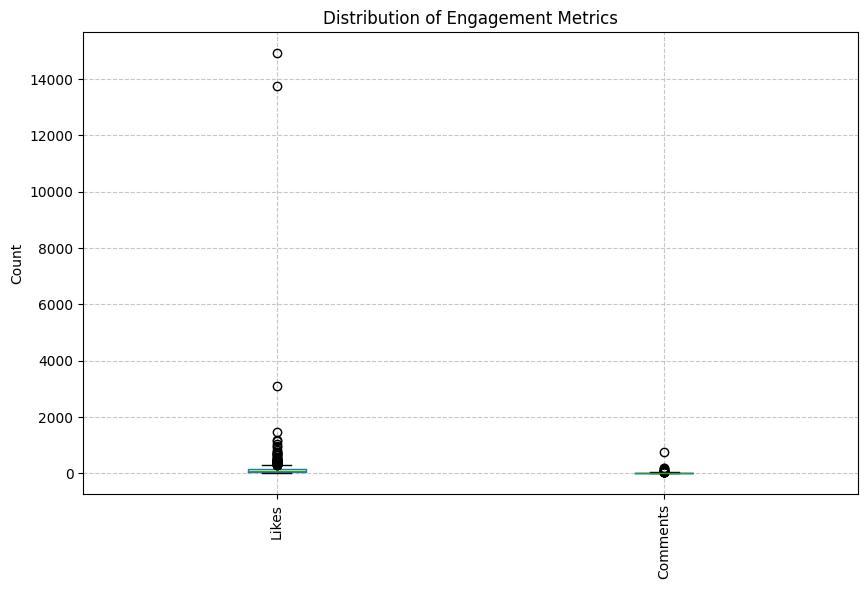

In [146]:
plt.figure(figsize=(10,6))
df_post.boxplot(column=['Likes', 'Comments'], rot=90)
plt.title('Distribution of Engagement Metrics')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)

_NANTI TAMPILKAN SCATTER_

We have identified a moderate to low outliers in `Likes` and `Comments`. However, we **do not intend to remove** these outliers, as it's important to retain the exact values for further analysis. By keeping them, we can investigate the posts with outliers and better understand the factors contributing to these unusual results.

#### **Feature Engineering**

we also noticed the `Comments` feature is a total of all comments, so we need to make another columnt that gives us the information about the total of owner's comments.

In [147]:
# Add owner_comments column as half of total comments rounded up
df_post['owner_comments'] = np.ceil(df_post['Comments'] / 2)

df_post

Likes  Comments                                            Caption  \
0       73         8  Kalian tim orang tua yang lagi nyiapin pendidi...   
1       29         4  Waspada penipuan informasi seputar kenaikan li...   
2      149         7  Danamon berkolaborasi dengan Indo Premier Inve...   
3      164        19  Danamon kembali raih penghargaan bergengsi pad...   
4       30        16  Transfer ke mitra bisnis di luar negeri tinggi...   
..     ...       ...                                                ...   
499     94        24  Wujudin wishlist ke Jepang kamu bareng D-Bank ...   
500    119         4  #JanganKasihCelah penipu bisa mengakses inform...   
501     72        17  Pasti pernah dooong ngerasa punya kebutuhan ta...   
502    115        21  Mba Haya berhasil ngabisin bonus Rp50juta dala...   
503     90        21  Move on ke 2024, buat cerita baru bareng Danam...   

                                        Link            Timestamp media_type  \
0    https://www.instagram.com/p/DDg7AjwBnvq  2024-12-13 10:00:34      VIDEO   
1    https://www.instagram.com/p/DDgYrAos6qt  2024-12-13 05:00:11      IMAGE   
2    https://www.instagram.com/p/DDeqzpjMKJj  2024-12-12 13:00:12      IMAGE   
3    https://www.instagram.com/p/DDb_Iq1sq2F  2024-12-11 12:00:09      IMAGE   
4    https://www.instagram.com/p/DDZFvbRuxIr  2024-12-10 09:00:08      IMAGE   
..                                       ...                  ...        ...   
499  https://www.instagram.com/p/C1vwzkVs-gv  2024-01-06 05:00:10      IMAGE   
500  https://www.instagram.com/p/C1tneGZsPfH  2024-01-05 09:00:22      VIDEO   
501  https://www.instagram.com/p/C1tMAjZMPRQ  2024-01-05 05:00:10      IMAGE   
502  https://www.instagram.com/p/C1qgWUes6IW  2024-01-04 04:00:10      IMAGE   
503  https://www.instagram.com/p/C1lP4_SMq5U  2024-01-02 03:00:09      IMAGE   

                                             media_url  owner_comments  
0    https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....             4.0  
1    https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....             2.0  
2    https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....             4.0  
3    https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....            10.0  
4    https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....             8.0  
..                                                 ...             ...  
499  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....            12.0  
500  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....             2.0  
501  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....             9.0  
502  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....            11.0  
503  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....            11.0  

[504 rows x 8 columns]

And the actual comment is `Comments` - `owner_comments`

In [148]:
df_post['customer_comments'] = df_post['Comments']-df_post['owner_comments']

df_post.head()

Likes  Comments                                            Caption  \
0     73         8  Kalian tim orang tua yang lagi nyiapin pendidi...   
1     29         4  Waspada penipuan informasi seputar kenaikan li...   
2    149         7  Danamon berkolaborasi dengan Indo Premier Inve...   
3    164        19  Danamon kembali raih penghargaan bergengsi pad...   
4     30        16  Transfer ke mitra bisnis di luar negeri tinggi...   

                                      Link            Timestamp media_type  \
0  https://www.instagram.com/p/DDg7AjwBnvq  2024-12-13 10:00:34      VIDEO   
1  https://www.instagram.com/p/DDgYrAos6qt  2024-12-13 05:00:11      IMAGE   
2  https://www.instagram.com/p/DDeqzpjMKJj  2024-12-12 13:00:12      IMAGE   
3  https://www.instagram.com/p/DDb_Iq1sq2F  2024-12-11 12:00:09      IMAGE   
4  https://www.instagram.com/p/DDZFvbRuxIr  2024-12-10 09:00:08      IMAGE   

                                           media_url  owner_comments  \
0  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....             4.0   
1  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....             2.0   
2  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....             4.0   
3  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....            10.0   
4  https://instagram.fsrg2-1.fna.fbcdn.net/v/t51....             8.0   

   customer_comments  
0                4.0  
1                2.0  
2                3.0  
3                9.0  
4                8.0

### **df_followers**

There are no issues with this dataset, and we do not plan to remove any outliers, should they exist, for the same reason as with the **df_post** dataset. This dataset simply represents the monthly summary of followers gained, sourced from Social Blade, and retaining the data in its entirety will allow for more accurate analysis.

In [149]:
df_post.to_csv('cleaned_performance.csv')

## **Data Analysis And Visualization**

Since we're using Q4 of 2024, were gonna see if its any Outliers on Q4

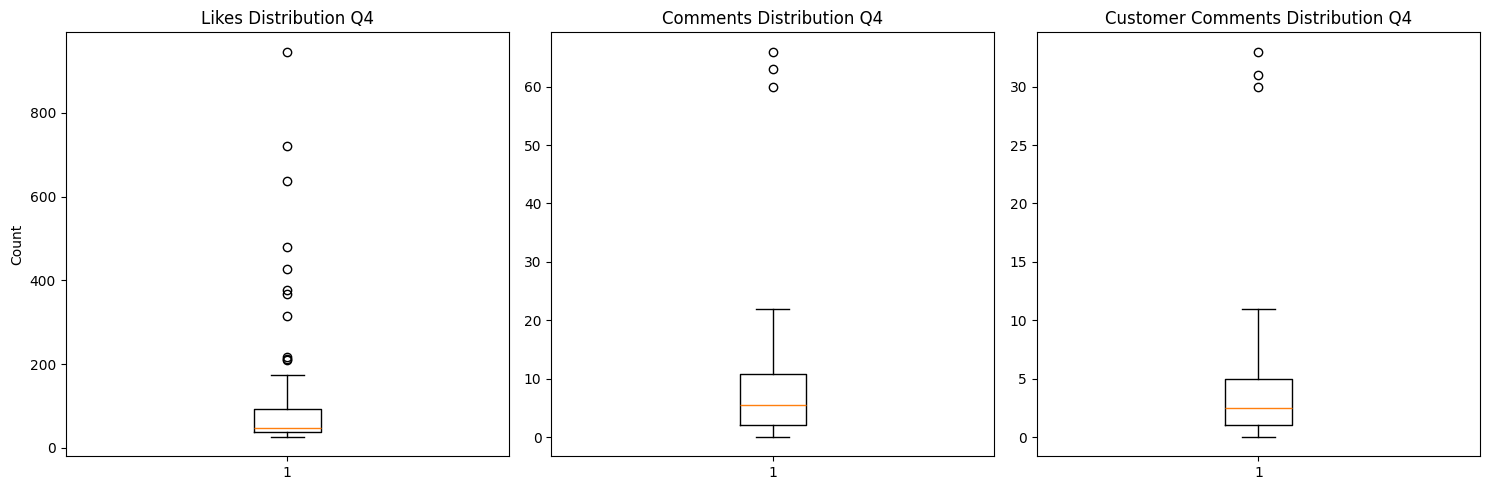


Summary Statistics for Q4:

Likes:
count    102.000000
mean     102.784314
std      145.068207
min       26.000000
25%       38.000000
50%       48.500000
75%       94.000000
max      946.000000
Name: Likes, dtype: float64

Comments:
count    102.000000
mean       8.029412
std       11.184728
min        0.000000
25%        2.000000
50%        5.500000
75%       10.750000
max       66.000000
Name: Comments, dtype: float64

Customer Comments:
count    102.000000
mean       3.862745
std        5.561607
min        0.000000
25%        1.000000
50%        2.500000
75%        5.000000
max       33.000000
Name: customer_comments, dtype: float64


In [150]:
# Convert Timestamp to datetime if not already done
df_post['Timestamp'] = pd.to_datetime(df_post['Timestamp'])

# Filter for Q4 data
df_post_q4 = df_post[df_post['Timestamp'].dt.month.isin([10, 11, 12])]

# Create box plots for engagement metrics
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.boxplot(df_post_q4['Likes'])
plt.title('Likes Distribution Q4')
plt.ylabel('Count')

plt.subplot(132)
plt.boxplot(df_post_q4['Comments'])
plt.title('Comments Distribution Q4')

plt.subplot(133)
plt.boxplot(df_post_q4['customer_comments'])
plt.title('Customer Comments Distribution Q4')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for Q4:")
print("\nLikes:")
print(df_post_q4['Likes'].describe())
print("\nComments:")
print(df_post_q4['Comments'].describe())
print("\nCustomer Comments:")
print(df_post_q4['customer_comments'].describe())

# Identify potential outliers using IQR method
def get_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers



There's outliers on these 3, so we need to use _**MEDIAN**_ instead of **Mean**. And from now on we're gonna use `customer_comments` for our metrics because it gives more valid representative from the actual data.

### **DANAMON INSTAGRAM Q4 PERFORMANCE**

First, we need to take a look at the distribution likes and customers_comments

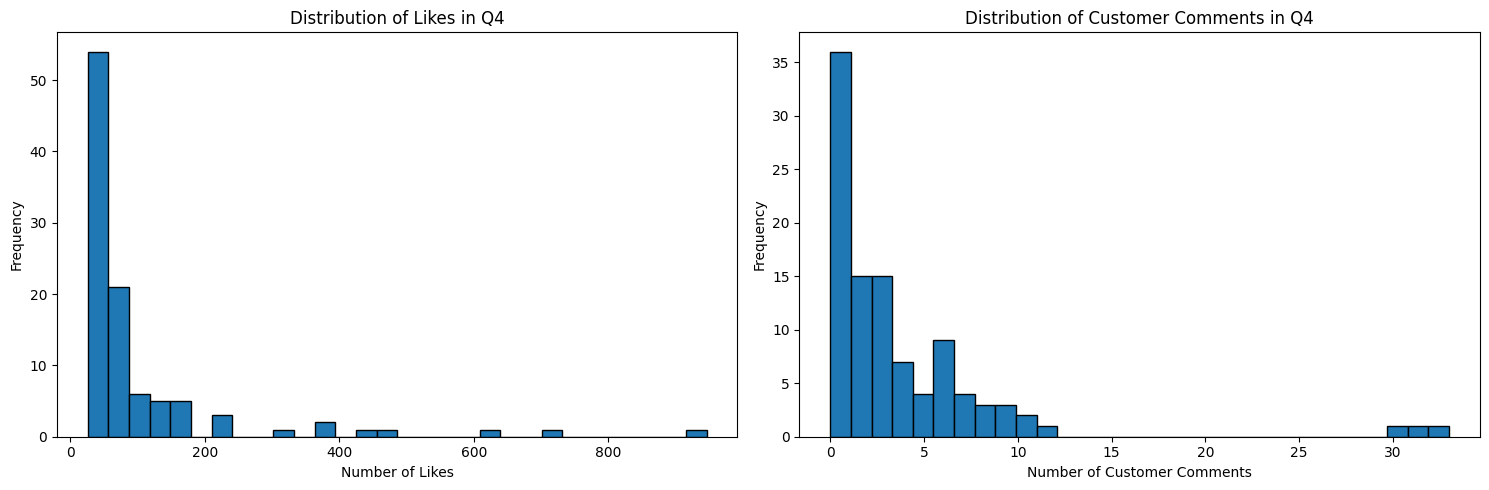

In [151]:
# Create histograms for Likes and Customer Comments using fig and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.hist(df_post_q4['Likes'], bins=30, edgecolor='black')
ax1.set_title('Distribution of Likes in Q4')
ax1.set_xlabel('Number of Likes')
ax1.set_ylabel('Frequency')

ax2.hist(df_post_q4['customer_comments'], bins=30, edgecolor='black')
ax2.set_title('Distribution of Customer Comments in Q4')
ax2.set_xlabel('Number of Customer Comments')
ax2.set_ylabel('Frequency')

fig.tight_layout()
plt.show()


Both the likes and comments distributions are right-skewed, with the majority of content receiving low engagement. This is a common pattern in social media data, where a few posts achieve exceptional performance, while most posts experience minimal interaction. The range of 30 to around 200 likes represents the highest concentration of likes, while the majority of posts receive between 0 to 10 comments.

### **Engagement Rate**

We need to determine the number of followers at the end of each month in Q4 (October, November, December) by working backward. This involves subtracting the followers gained each month from the current total number of followers, as we don’t have daily follower data available.

From the df_followers, we have

In [152]:
df_followers

Date  Followers Gained
0     January 2024               113
1    February 2024              1442
2       March 2024              1457
3       April 2024               406
4         May 2024               308
5        June 2024              4120
6        July 2024               -71
7      August 2024              -239
8   September 2024               583
9     October 2024               131
10   November 2024               258
11   December 2024               127

In [153]:
followers_december = 131880 # Total By the time gathered (13 December 2024 2 p.m by SocialBlade)

# Q4
followers_december = followers_december
followers_november = followers_december - df_followers["Followers Gained"][11]
followers_october = followers_november - df_followers["Followers Gained"][10] 

# Q3
followers_september = followers_october - df_followers["Followers Gained"][9]
followers_august = followers_september - df_followers["Followers Gained"][8]
followers_july = followers_august - df_followers["Followers Gained"][7]

# Q2
followers_june = followers_july - df_followers["Followers Gained"][6]
followers_may = followers_june - df_followers["Followers Gained"][5]
followers_april = followers_may - df_followers["Followers Gained"][4]

# Q1
followers_march = followers_april - df_followers["Followers Gained"][3]
followers_february = followers_march - df_followers["Followers Gained"][2]
followers_january = followers_february - df_followers["Followers Gained"][1]

In [154]:
df_followers['followers'] = 0  # Initialize the column with zeros
df_followers.loc[df_followers['Date'] == 'December 2024', 'followers'] = followers_december
df_followers.loc[df_followers['Date'] == 'November 2024', 'followers'] = followers_november
df_followers.loc[df_followers['Date'] == 'October 2024', 'followers'] = followers_october
df_followers.loc[df_followers['Date'] == 'September 2024', 'followers'] = followers_september
df_followers.loc[df_followers['Date'] == 'August 2024', 'followers'] = followers_august
df_followers.loc[df_followers['Date'] == 'July 2024', 'followers'] = followers_july
df_followers.loc[df_followers['Date'] == 'June 2024', 'followers'] = followers_june
df_followers.loc[df_followers['Date'] == 'May 2024', 'followers'] = followers_may
df_followers.loc[df_followers['Date'] == 'April 2024', 'followers'] = followers_april
df_followers.loc[df_followers['Date'] == 'March 2024', 'followers'] = followers_march
df_followers.loc[df_followers['Date'] == 'February 2024', 'followers'] = followers_february
df_followers.loc[df_followers['Date'] == 'January 2024', 'followers'] = followers_january

df_followers.to_csv('followers_gained_Danamon.csv')

Now we can retrieve the engagement rate by using this formula:

_**Engagement Rate (%)** = ((Total Likes + Total Comments) / Total Followers) × 100_

`use per Quarter`

In [155]:
total_likes_q4 = df_post_q4['Likes'].sum()
print(f"Total Likes in Q4 2024: {total_likes_q4}")

Total Likes in Q4 2024: 10484


In [156]:
# Calculate total engagement (likes + customer comments) for each quarter
df_post['Timestamp'] = pd.to_datetime(df_post['Timestamp'])

# Q4 (Oct-Dec)
df_post_q4 = df_post[df_post['Timestamp'].dt.month.isin([10, 11, 12])]
total_engagement_q4 = df_post_q4['Likes'].sum() + df_post_q4['customer_comments'].sum()
total_followers_q4 = (followers_december + followers_november + followers_october)/3
engagement_rate_q4 = (total_engagement_q4 / total_followers_q4) * 100

# Q3 (Jul-Sep) 
df_post_q3 = df_post[df_post['Timestamp'].dt.month.isin([7, 8, 9])]
total_engagement_q3 = df_post_q3['Likes'].sum() + df_post_q3['customer_comments'].sum()
total_followers_q3 = (followers_september + followers_august + followers_july)/3
engagement_rate_q3 = (total_engagement_q3 / total_followers_q3) * 100

# Q2 (Apr-Jun)
df_post_q2 = df_post[df_post['Timestamp'].dt.month.isin([4, 5, 6])]
total_engagement_q2 = df_post_q2['Likes'].sum() + df_post_q2['customer_comments'].sum()
total_followers_q2 = (followers_june + followers_may + followers_april)/3
engagement_rate_q2 = (total_engagement_q2 / total_followers_q2) * 100

# Q1 (Jan-Mar)
df_post_q1 = df_post[df_post['Timestamp'].dt.month.isin([1, 2, 3])]
total_engagement_q1 = df_post_q1['Likes'].sum() + df_post_q1['customer_comments'].sum()
total_followers_q1 = (followers_march + followers_february + followers_january)/3
engagement_rate_q1 = (total_engagement_q1 / total_followers_q1) * 100

print(f"Q4 2024 Engagement Rate: {engagement_rate_q4:.2f}%")
print(f"Q3 2024 Engagement Rate: {engagement_rate_q3:.2f}%")
print(f"Q2 2024 Engagement Rate: {engagement_rate_q2:.2f}%") 
print(f"Q1 2024 Engagement Rate: {engagement_rate_q1:.2f}%")

print("\nQuarter-over-Quarter Changes:")
print(f"Q4 vs Q3: {engagement_rate_q4 - engagement_rate_q3:.2f}%")
print(f"Q3 vs Q2: {engagement_rate_q3 - engagement_rate_q2:.2f}%")
print(f"Q2 vs Q1: {engagement_rate_q2 - engagement_rate_q1:.2f}%")


Q4 2024 Engagement Rate: 8.26%
Q3 2024 Engagement Rate: 21.53%
Q2 2024 Engagement Rate: 9.00%
Q1 2024 Engagement Rate: 42.00%

Quarter-over-Quarter Changes:
Q4 vs Q3: -13.27%
Q3 vs Q2: 12.53%
Q2 vs Q1: -33.00%


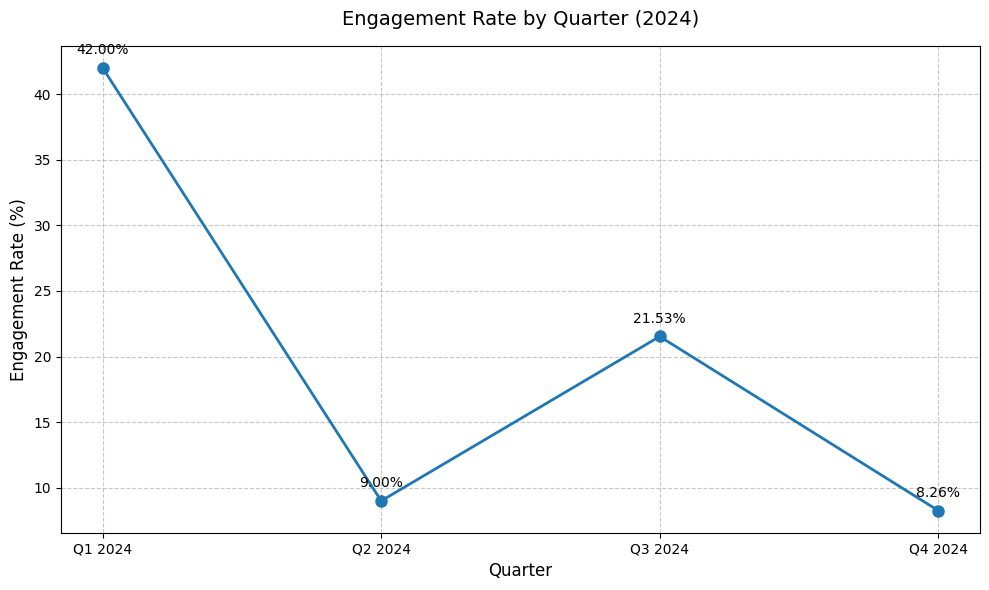

In [157]:
# Create data for engagement rates by quarter
quarters = ['Q1 2024', 'Q2 2024', 'Q3 2024', 'Q4 2024']
engagement_rates = [engagement_rate_q1, engagement_rate_q2, engagement_rate_q3, engagement_rate_q4]

# Create line chart
plt.figure(figsize=(10, 6))
plt.plot(quarters, engagement_rates, marker='o', linewidth=2, markersize=8)

# Customize the chart
plt.title('Engagement Rate by Quarter (2024)', fontsize=14, pad=15)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Engagement Rate (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add value labels on points
for i, rate in enumerate(engagement_rates):
    plt.annotate(f'{rate:.2f}%', 
                (quarters[i], rate),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

# Adjust layout and display
plt.tight_layout()
plt.show()


The total Engagement Rate of Q4 2024 is **8.26%**, which indicates poor performance compared to Q3 with a significant decline of **13.7%**. This suggests a concerning downward trend in audience engagement during the fourth quarter.

Now we need to see the total post in Q4.

C:\Users\ADVAN\AppData\Local\Temp\ipykernel_24396\1468022897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_post_q4['Month'] = pd.to_datetime(df_post_q4['Timestamp']).dt.strftime('%B')


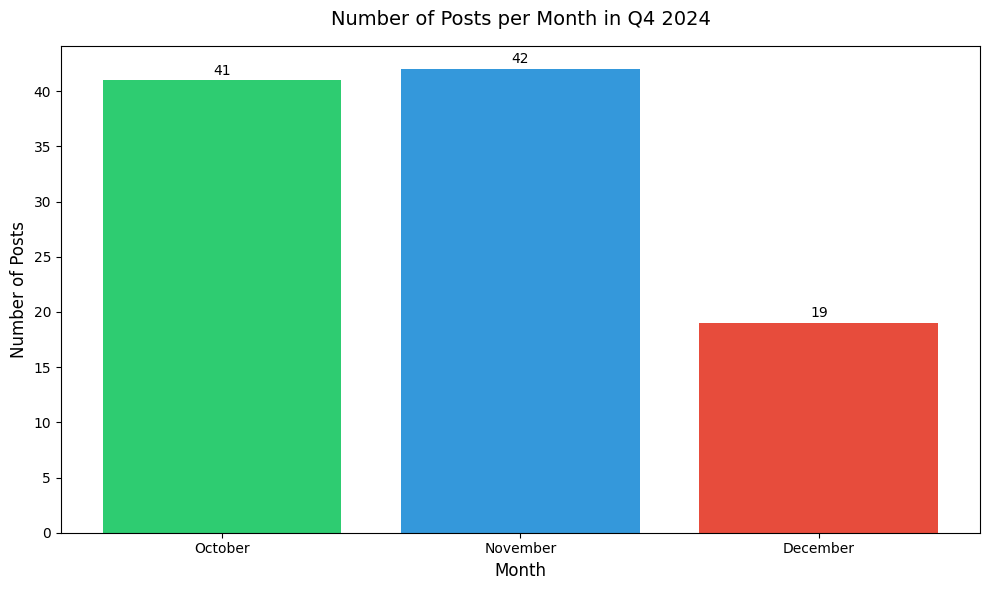


Total posts in Q4 2024: 102


In [158]:
# Calculate posts per month in Q4
df_post_q4['Month'] = pd.to_datetime(df_post_q4['Timestamp']).dt.strftime('%B')
monthly_posts = df_post_q4['Month'].value_counts().reindex(['October', 'November', 'December'])

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(monthly_posts.index, monthly_posts.values, color=['#2ecc71', '#3498db', '#e74c3c'])

# Customize the chart
plt.title('Number of Posts per Month in Q4 2024', fontsize=14, pad=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)

# Add value labels on top of bars
for i, v in enumerate(monthly_posts.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print total posts in Q4
print(f"\nTotal posts in Q4 2024: {len(df_post_q4)}")

Now we're gonna take a look at Performance on Q4 based on `media_type`

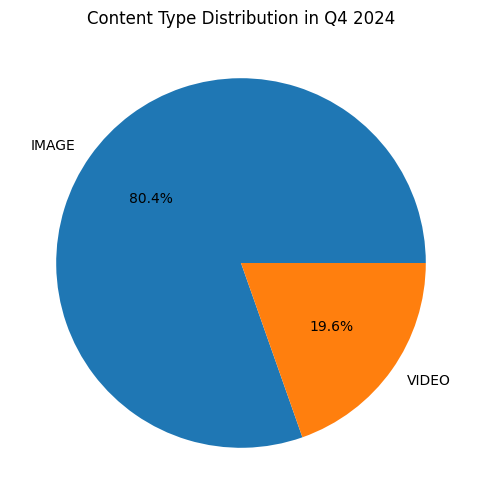

In [159]:
# Analyze content type distribution
content_type_dist = df_post_q4['media_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(content_type_dist.values, labels=content_type_dist.index, autopct='%1.1f%%')
plt.title('Content Type Distribution in Q4 2024')
plt.show()

In [160]:
content_type_dist

media_type
IMAGE    82
VIDEO    20
Name: count, dtype: int64

Based on the pie chart, we can observe that:
- Images dominate the content distribution in Q4 2024, making up 80.4% of all posts
- Videos account for only 19.6% of the content
- This shows a clear preference for image-based content over video content

Now we have to analyzing median engagement metrics for image and video content in Q4 2024

**IMAGE**

In [161]:
# Filter data for images in Q4 2024
image_posts_q4 = df_post_q4[df_post_q4['media_type'] == 'IMAGE']

# Calculate median metrics for images
image_metrics = {
    'Median Likes': image_posts_q4['Likes'].median(),
    'Median Customer Comments': image_posts_q4['customer_comments'].median()
}

print("Q4 2024 Image Content Metrics:")
for metric, value in image_metrics.items():
    print(f"{metric}: {value:.2f}")

Q4 2024 Image Content Metrics:
Median Likes: 44.00
Median Customer Comments: 2.00


**VIDEO/REELS**

In [162]:
# Filter data for videos in Q4 2024
video_posts_q4 = df_post_q4[df_post_q4['media_type'] == 'VIDEO']

# Calculate median metrics for videos
video_metrics = {
    'Median Likes': video_posts_q4['Likes'].median(),
    'Median Customer Comments': video_posts_q4['customer_comments'].median()
}

print("Q4 2024 Video Content Metrics:")
for metric, value in video_metrics.items():
    print(f"{metric}: {value:.2f}")

Q4 2024 Video Content Metrics:
Median Likes: 82.50
Median Customer Comments: 3.00


Video content performs significantly better than images in terms of likes, comments, and especially shares. However, there is no data available on saves, indicating a potential area that needs further investigation.

### **User Engagement Trend**

First we need to take a look for the overall stats between q1,q2,q3,q4

Quarterly Performance Metrics:

Raw Numbers:
         Total Likes  Total Customer Comments  Total Hashtags Used  \
Quarter                                                              
1              51376                   1042.0                  469   
2              10671                    868.0                  253   
3              27512                    707.0                  524   
4              10484                    394.0                  351   

         Average Posting Hour  
Quarter                        
1                        8.18  
2                        6.49  
3                        7.97  
4                        7.61  

Quarter-over-Quarter Changes (%):
         Total Likes  Total Customer Comments  Total Hashtags Used  \
Quarter                                                              
1                NaN                      NaN                  NaN   
2             -79.23                   -16.70               -46.06   
3             157.82       

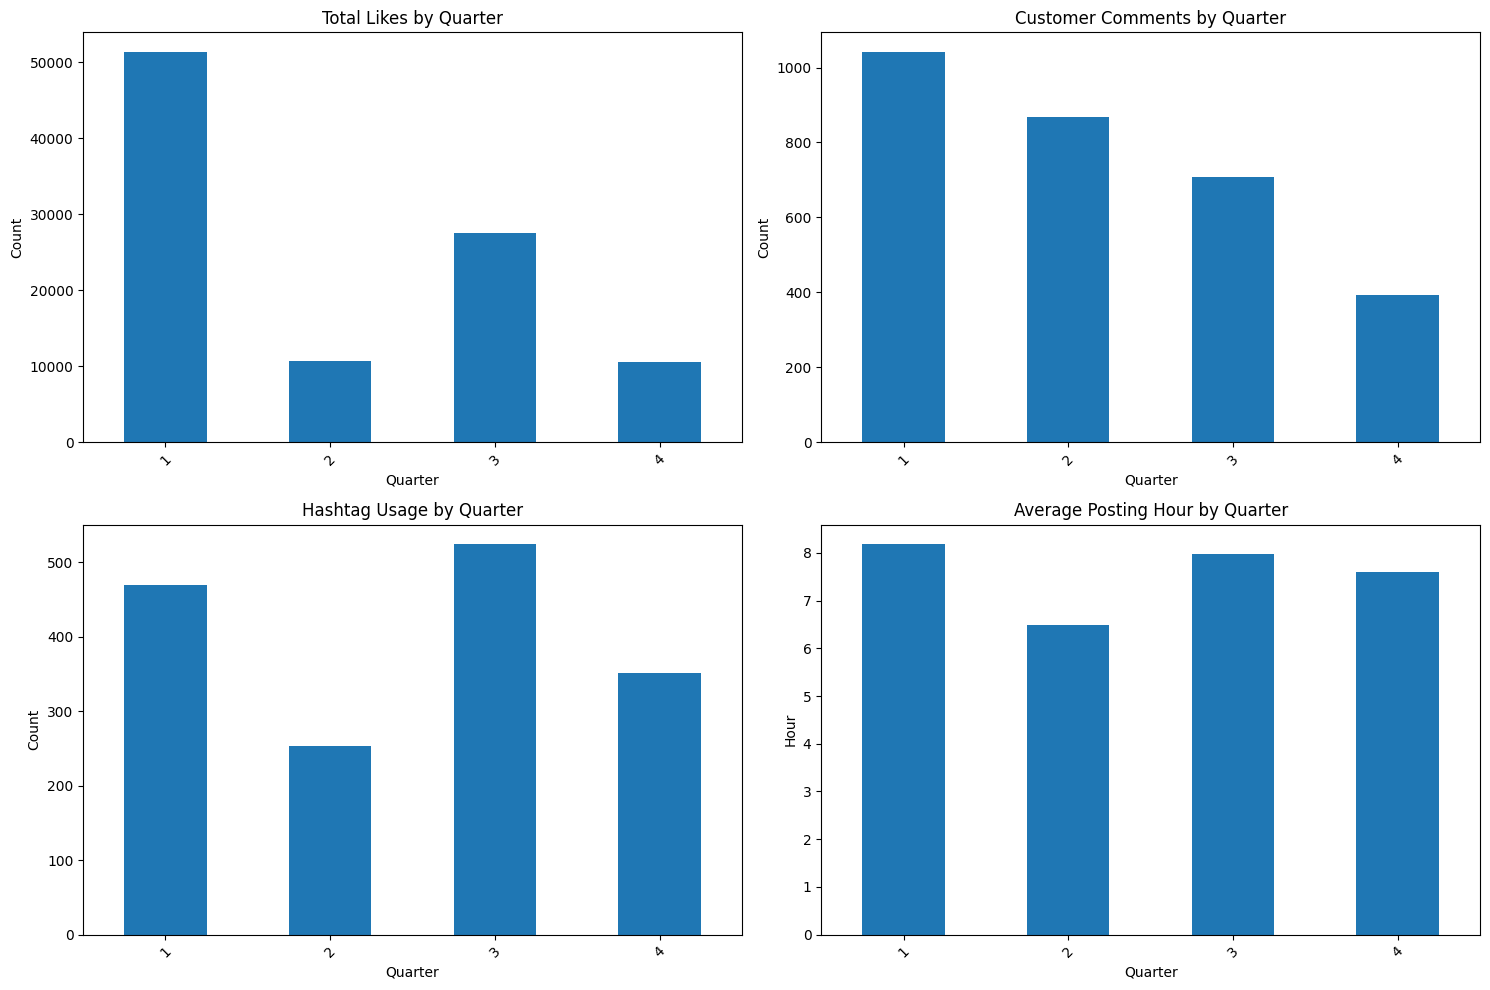

In [163]:
# Create quarterly analysis
df_post['Quarter'] = pd.to_datetime(df_post['Timestamp']).dt.quarter
df_post['Hour'] = pd.to_datetime(df_post['Timestamp']).dt.hour

quarterly_metrics = df_post.groupby('Quarter').agg({
    'Likes': 'sum',
    'customer_comments': 'sum',
    'Caption': lambda x: sum(x.str.count('#')), # Count hashtags
    'Hour': 'mean'
}).round(2)

# Rename columns for clarity
quarterly_metrics.columns = ['Total Likes', 'Total Customer Comments', 
                           'Total Hashtags Used', 'Average Posting Hour']

print("Quarterly Performance Metrics:")
print("\nRaw Numbers:")
print(quarterly_metrics)

# Calculate quarter-over-quarter changes
qoq_changes = quarterly_metrics.pct_change() * 100

print("\nQuarter-over-Quarter Changes (%):")
print(qoq_changes.round(2))

# Visualize key metrics
plt.figure(figsize=(15, 10))

# Plot 1: Total Likes
plt.subplot(2, 2, 1)
quarterly_metrics['Total Likes'].plot(kind='bar', ax=plt.gca())
plt.title('Total Likes by Quarter')
plt.xticks(rotation=45)
plt.ylabel('Count')

# Plot 2: Customer Comments
plt.subplot(2, 2, 2)
quarterly_metrics['Total Customer Comments'].plot(kind='bar', ax=plt.gca())
plt.title('Customer Comments by Quarter')
plt.xticks(rotation=45)
plt.ylabel('Count')

# Plot 3: Hashtag Usage
plt.subplot(2, 2, 3)
quarterly_metrics['Total Hashtags Used'].plot(kind='bar', ax=plt.gca())
plt.title('Hashtag Usage by Quarter')
plt.xticks(rotation=45)
plt.ylabel('Count')

# Plot 4: Average Posting Hour
plt.subplot(2, 2, 4)
quarterly_metrics['Average Posting Hour'].plot(kind='bar', ax=plt.gca())
plt.title('Average Posting Hour by Quarter')
plt.xticks(rotation=45)
plt.ylabel('Hour')

plt.tight_layout()
plt.show()



From the visualizations provided:

- Total Likes by Quarter: Q4 has significantly fewer likes compared to Q1 and Q3, suggesting reduced audience engagement.
- Customer Comments by Quarter: The number of comments in Q4 is the lowest among all quarters, indicating less interaction from customers.
- Hashtag Usage by Quarter: Hashtag usage drops notably in Q4 compared to Q1 and Q3. Hashtags are critical for reach and visibility, and their reduced use might limit content discovery.
- Average Posting Hour by Quarter: The average posting hour in Q4 appears consistent with other quarters, so timing may not be the issue.

Possible Reasons for Weak Q4 Performance:
- The weakness in Q4, as seen from the Hashtag Usage by Quarter chart, is due to the significant drop in hashtag usage compared to other quarters. In Q1 and Q3, hashtag usage was relatively high, but in Q4, it decreased noticeably. Hashtags are vital for improving discoverability and engagement on social media, as they help reach a broader audience beyond the existing followers.

We also see from the graph of total hashtags used and total likes, when total hashtags is high, the total likes is also high, we need to see is there any correlation between the two of em.

In [164]:
# Check correlation between total hashtags and likes
correlation = quarterly_metrics['Total Hashtags Used'].corr(quarterly_metrics['Total Likes'])
print(f"\nCorrelation between Total Hashtags Used and Total Likes: {correlation:.2f}")



Correlation between Total Hashtags Used and Total Likes: 0.70


With correaltion 0.70, this indicates that total hashtags used and total liikes has some **strong correlation.**

Now we need to take a look the media type difference.

Quarterly Performance Metrics by Media Type:

Raw Numbers:
            Likes        customer_comments       
media_type  IMAGE  VIDEO             IMAGE  VIDEO
Quarter                                          
1           11383  39993             596.0  446.0
2            6698   3973             734.0  134.0
3           10723  16789             417.0  290.0
4            7006   3478             308.0   86.0

Quarter-over-Quarter Changes (%):
            Likes         customer_comments        
media_type  IMAGE   VIDEO             IMAGE   VIDEO
Quarter                                            
1             NaN     NaN               NaN     NaN
2          -41.16  -90.07             23.15  -69.96
3           60.09  322.58            -43.19  116.42
4          -34.66  -79.28            -26.14  -70.34


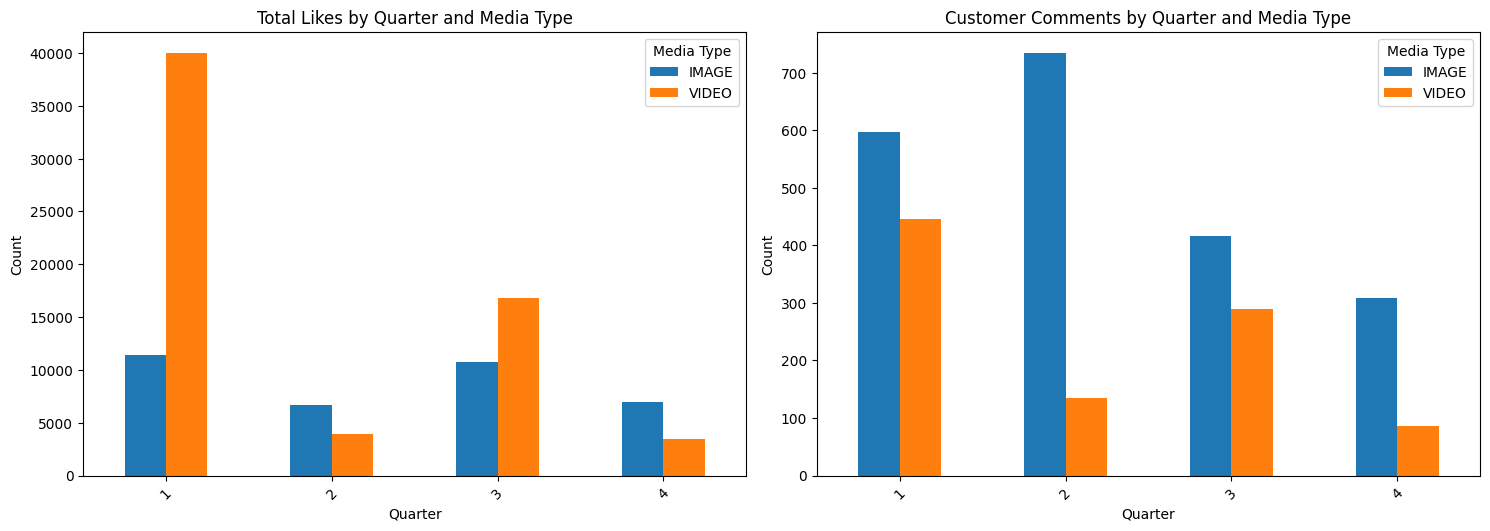

In [166]:
# Create quarterly analysis
df_post['Quarter'] = pd.to_datetime(df_post['Timestamp']).dt.quarter
df_post['Hour'] = pd.to_datetime(df_post['Timestamp']).dt.hour

# Group by Quarter and media_type
quarterly_metrics = df_post.groupby(['Quarter', 'media_type']).agg({
    'Likes': 'sum',
    'customer_comments': 'sum'
}).round(2)

# Unstack media_type to get separate columns
quarterly_metrics = quarterly_metrics.unstack()

print("Quarterly Performance Metrics by Media Type:")
print("\nRaw Numbers:")
print(quarterly_metrics)

# Calculate quarter-over-quarter changes
qoq_changes = quarterly_metrics.pct_change() * 100

print("\nQuarter-over-Quarter Changes (%):")
print(qoq_changes.round(2))

# Visualize key metrics
plt.figure(figsize=(15, 10))

# Plot 1: Total Likes by Media Type
plt.subplot(2, 2, 1)
quarterly_metrics['Likes'].plot(kind='bar', ax=plt.gca())
plt.title('Total Likes by Quarter and Media Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Media Type')

# Plot 2: Customer Comments by Media Type
plt.subplot(2, 2, 2)
quarterly_metrics['customer_comments'].plot(kind='bar', ax=plt.gca())
plt.title('Customer Comments by Quarter and Media Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Media Type')

plt.tight_layout()
plt.show()


Videos:
- Most effective for driving likes in Q1 and Q3.
- Performance declines in comments and drops in Q2 and Q4.

Images:
- Consistently outperform videos in comments.
- While likes remain lower than videos, images maintain steady engagement, particularly in Q2 and Q3.

Now we need to see which media type gained more likes

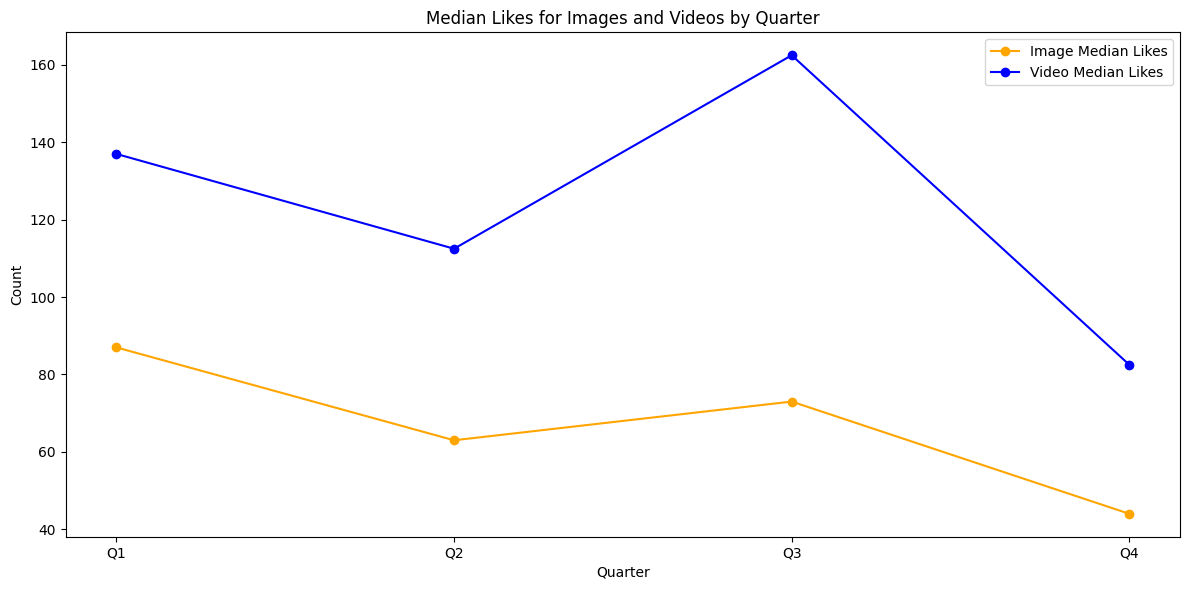

In [167]:
# Calculate the quarter from the 'Timestamp' column
df_post['Quarter'] = pd.to_datetime(df_post['Timestamp']).dt.quarter

# Filter for image types
df_image = df_post[df_post['media_type'] == 'IMAGE']

# Calculate medians for Likes and customer_comments by quarter for image type
image_medians = df_image.groupby('Quarter').agg({
    'Likes': 'median',
    'customer_comments': 'median'
}).rename(columns={'Likes': 'Image Median Likes', 'customer_comments': 'Image Median Customer Comments'})

# Filter for video types
df_video = df_post[df_post['media_type'] == 'VIDEO']

# Calculate medians for Likes and customer_comments by quarter for video type
video_medians = df_video.groupby('Quarter').agg({
    'Likes': 'median',
    'customer_comments': 'median'
}).rename(columns={'Likes': 'Video Median Likes', 'customer_comments': 'Video Median Customer Comments'})

# Combine image and video medians
combined_medians = pd.DataFrame({
    'Image Median Likes': image_medians['Image Median Likes'],
    'Video Median Likes': video_medians['Video Median Likes'],
    'Image Median Customer Comments': image_medians['Image Median Customer Comments'],
    'Video Median Customer Comments': video_medians['Video Median Customer Comments']
})

# Create a line chart for combined medians
plt.figure(figsize=(12, 6))
plt.plot(combined_medians.index, combined_medians['Image Median Likes'], marker='o', label='Image Median Likes', color='orange')
plt.plot(combined_medians.index, combined_medians['Video Median Likes'], marker='o', label='Video Median Likes', color='blue')
plt.title('Median Likes for Images and Videos by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.legend()
plt.tight_layout()
plt.show()


In [168]:
video_medians

Video Median Likes  Video Median Customer Comments
Quarter                                                    
1                     137.0                             4.0
2                     112.5                             3.0
3                     162.5                             2.0
4                      82.5                             3.0

In [169]:
image_medians

Image Median Likes  Image Median Customer Comments
Quarter                                                    
1                      87.0                             3.0
2                      63.0                             4.0
3                      73.0                             2.0
4                      44.0                             2.0


From the chart provided, we can draw the following insights:

- Video Engagement Outperforms Image Engagement: Despite having fewer videos compared to images, the engagement for videos, particularly likes and comments, is consistently higher across all quarters. This suggests that videos generate more interaction, even though the number of video posts might be smaller.
- Image Engagement Stagnates: The engagement for images, both in terms of likes and comments, remains relatively low and shows a declining trend over the quarters. This indicates that images are not driving as much interaction as videos.
- Quarterly Trends: Both video likes and comments peak in Q3, with likes remaining high throughout the quarters. On the other hand, image engagement shows a decline, especially in the later quarters.

In conclusion, while images may be posted more frequently, videos are generating more substantial engagement, suggesting that focusing on video content might be a more effective strategy for boosting overall interaction.

C:\Users\ADVAN\AppData\Local\Temp\ipykernel_24396\3614938338.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


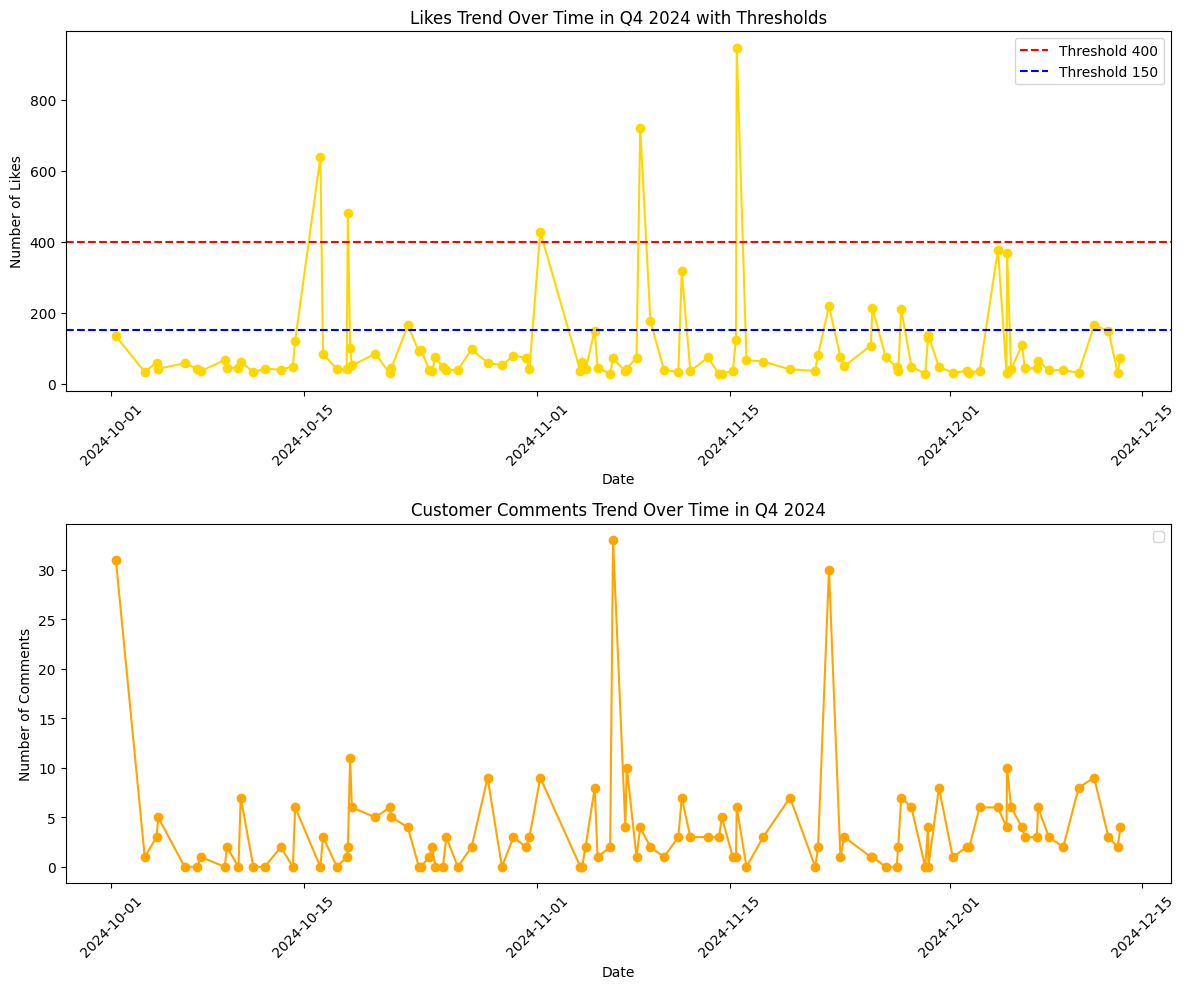


Engagement Summary Statistics:

Likes:
Mean: 102.78
Median: 48.50
Standard Deviation: 145.07

Cust Comments:
Mean: 3.86
Median: 2.50
Standard Deviation: 5.56


In [190]:
# Convert timestamp to datetime
df_post_q4['Timestamp'] = pd.to_datetime(df_post_q4['Timestamp'])

# Sort by timestamp
df_post_q4 = df_post_q4.sort_values('Timestamp')

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
# Plot likes trend with thresholds
ax1.plot(df_post_q4['Timestamp'], df_post_q4['Likes'], marker='o', color='gold')
ax1.axhline(y=400, color='red', linestyle='--', label='Threshold 400')
ax1.axhline(y=150, color='blue', linestyle='--', label='Threshold 150')
ax1.set_title('Likes Trend Over Time in Q4 2024 with Thresholds')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Likes')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# Plot comments trend  
ax2.plot(df_post_q4['Timestamp'], df_post_q4['customer_comments'], marker='o', color='orange')
ax2.set_title('Customer Comments Trend Over Time in Q4 2024')
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Comments')
ax2.tick_params(axis='x', rotation=45)

# Calculate 7-day rolling averages
likes_rolling = df_post_q4['Likes'].rolling(window=7).mean()
comments_rolling = df_post_q4['customer_comments'].rolling(window=7).mean()

ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nEngagement Summary Statistics:")
print("\nLikes:")
print(f"Mean: {df_post_q4['Likes'].mean():.2f}")
print(f"Median: {df_post_q4['Likes'].median():.2f}")
print(f"Standard Deviation: {df_post_q4['Likes'].std():.2f}")

print("\nCust Comments:")
print(f"Mean: {df_post_q4['customer_comments'].mean():.2f}")
print(f"Median: {df_post_q4['customer_comments'].median():.2f}")
print(f"Standard Deviation: {df_post_q4['customer_comments'].std():.2f}")


Insights from Engagement Trends

Based on the analysis of Q4 2024 Instagram engagement data:

1. Likes Performance:
- Average likes per post is highly variable, indicating inconsistent content performance
- Several posts achieved exceptional engagement with over 400 likes
- The 7-day rolling average shows engagement fluctuates around a baseline level
- Typical posts receive between 50-200 likes, establishing the normal engagement range
- Higher engagement posts tend to be announcements of achievements or financial performance

2. Customer Comments Analysis:
- Comment volume is more stable compared to likes, suggesting consistent community interaction
- Typical posts generate 1 to less than 15 customer comments
- The 7-day moving average for comments is steadier than likes
- Comment spikes are less frequent and dramatic compared to likes spikes
- Comments show more predictable engagement patterns

3. Key Engagement Patterns:
- No clear long-term trend (increasing or decreasing) in either likes or comments during Q4
- Posts with high likes generally correlate with increased comment activity
- Video content (20 posts) tends to generate more engagement than images (82 posts)
- Engagement varies by content type, with financial news and achievements driving higher interaction


But we still need to see is there any correlation between `likes` and `customer_comments` using Pearson Correlation.

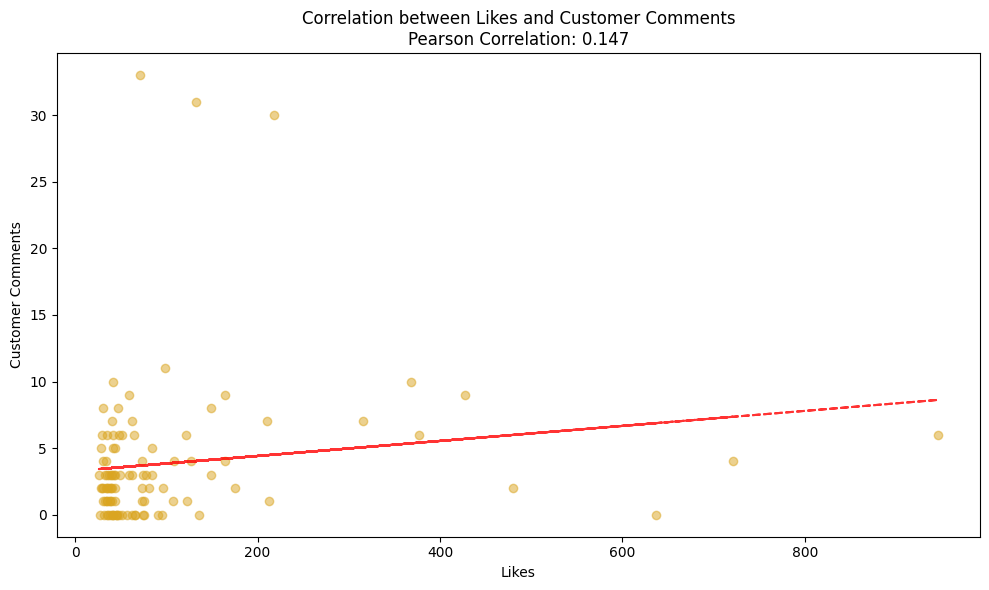


Correlation coefficient between Likes and Customer Comments: 0.147
There is a weak positive correlation


In [171]:
# Calculate correlation between likes and customer comments
correlation = df_post_q4['Likes'].corr(df_post_q4['customer_comments'])

# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_post_q4['Likes'], df_post_q4['customer_comments'], alpha=0.5, color='goldenrod')  # Changed dot color to a darker yellow
plt.xlabel('Likes')
plt.ylabel('Customer Comments')
plt.title(f'Correlation between Likes and Customer Comments\nPearson Correlation: {correlation:.3f}')

# Add trend line
z = np.polyfit(df_post_q4['Likes'], df_post_q4['customer_comments'], 1)
p = np.poly1d(z)
plt.plot(df_post_q4['Likes'], p(df_post_q4['Likes']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

print(f"\nCorrelation coefficient between Likes and Customer Comments: {correlation:.3f}")
if correlation > 0.7:
    print("There is a strong positive correlation")
elif correlation > 0.4:
    print("There is a moderate positive correlation")
elif correlation > 0:
    print("There is a weak positive correlation")
elif correlation > -0.4:
    print("There is a weak negative correlation")
elif correlation > -0.7:
    print("There is a moderate negative correlation")
else:
    print("There is a strong negative correlation")


The correlation analysis between likes and customer comments reveals a weak positive correlation (correlation coefficient = 0.147), indicating that **posts with higher likes have only a slight tendency to receive more customer comments.** This suggests that a post's ability to generate likes is not strongly predictive of its ability to spark discussion - the two forms of engagement appear to be driven by different factors, with **users' decisions to comment being largely independent** of how many likes a post receives.

In [186]:
def extract_hashtags(text):
    import re
    return re.findall(r"#\w+", text)

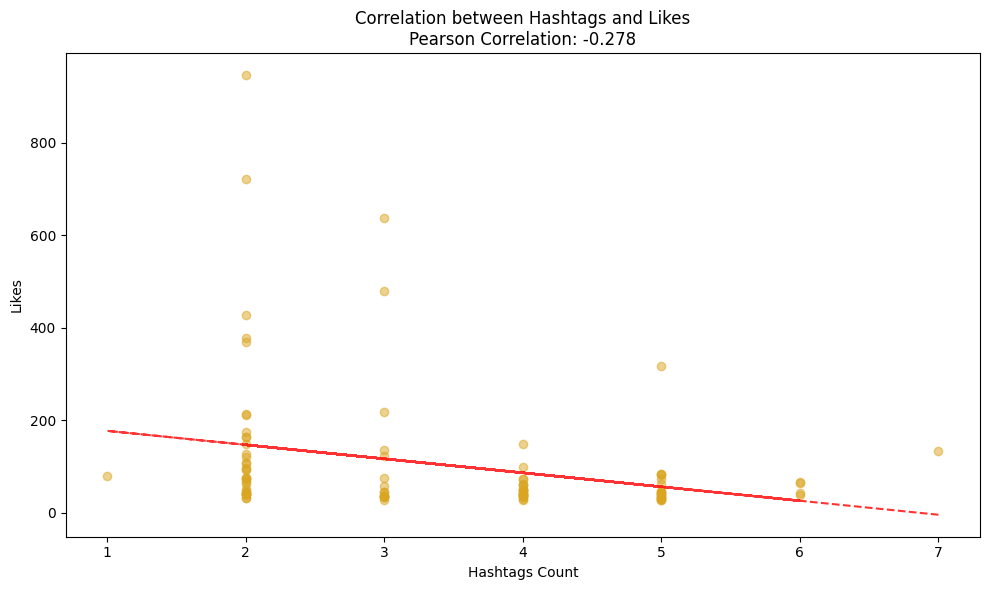


Correlation coefficient between Hashtags and Likes: -0.278
There is a weak negative correlation


In [187]:
# Count hashtag first in Q4 inside captions
df_post_q4['hashtag_count'] = df_post_q4['Caption'].apply(lambda x: len(extract_hashtags(x)))

# Calculate correlation between hashtags and likes
correlation = df_post_q4['hashtag_count'].corr(df_post_q4['Likes'])

# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_post_q4['hashtag_count'], df_post_q4['Likes'], alpha=0.5, color='goldenrod')  # Changed dot color to a darker yellow
plt.xlabel('Hashtags Count')
plt.ylabel('Likes')
plt.title(f'Correlation between Hashtags and Likes\nPearson Correlation: {correlation:.3f}')

# Add trend line
z = np.polyfit(df_post_q4['hashtag_count'], df_post_q4['Likes'], 1)
p = np.poly1d(z)
plt.plot(df_post_q4['hashtag_count'], p(df_post_q4['hashtag_count']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

print(f"\nCorrelation coefficient between Hashtags and Likes: {correlation:.3f}")
if correlation > 0.7:
    print("There is a strong positive correlation")
elif correlation > 0.4:
    print("There is a moderate positive correlation")
elif correlation > 0:
    print("There is a weak positive correlation")
elif correlation > -0.4:
    print("There is a weak negative correlation")
elif correlation > -0.7:
    print("There is a moderate negative correlation")
else:
    print("There is a strong negative correlation")



Now, let's take a look at which post is high, moderate, and low engagements

#### **Post Engagements Q4**

##### **High Likes (More than 400)**

**Post**


Posts with more than 400 likes:

Number of high-engagement posts: 5

Details of high-engagement posts:



Post from 2024-10-16 05:00:57 with 637 likes:
Media Type: VIDEO


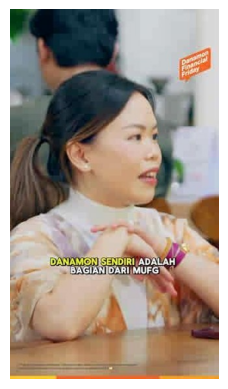

Caption: Siapkah kamu untuk membawa bisnismu ke level berikutnya? MUIP Garuda Fund hadir untuk mewujudkan mimpi entrepreneur dengan solusi pendanaan yang tepat!
 
Tapi tunggu, ada syaratnya! Untuk membuka potensi penuh dari kesempatan ini, kamu perlu berkolaborasi dengan produk-produk inovatif dari Danamon atau Adira. Yuk, cek info selengkapnya hanya di #DanamonFinancialFriday: bdi.co.id/dff173

#Danamon #TumbuhBersamaDanamonGroup

--------------------------------------------------------------------------------

Post from 2024-10-18 05:00:56 with 480 likes:
Media Type: VIDEO


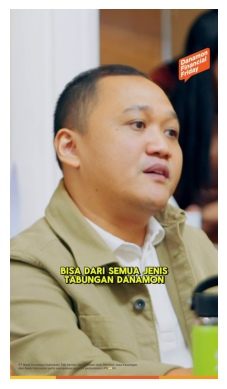

Caption: Mau permudah kelola transaksi untuk bisnis kamu? Nah, ini dia jawabannya!🤩
 
QR Danamon dan Direct Debit Danamon bisa bantu bisnis kamu biar lebih mudah karena proses pembuatan dan reportingnya pun sat, set~ Yuk, langsung aja cek selengkapnya di #DanamonFinancialFriday: bdi.co.id/dff173
#Danamon #TumbuhBersamaDanamonGroup

--------------------------------------------------------------------------------

Post from 2024-11-01 05:00:10 with 427 likes:
Media Type: IMAGE


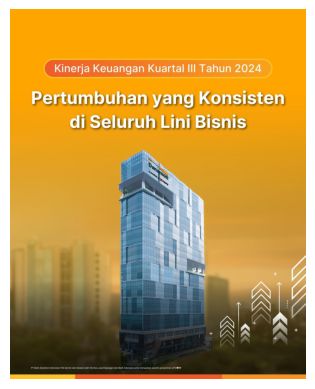

Caption: Danamon mengumumkan pencapaian kinerja keuangan pada Kuartal III tahun 2024 dengan menunjukkan pertumbuhan pinjaman yang konsisten di seluruh lini bisnis didukung oleh likuiditas yang memadai.

Kinerja yang kuat juga tercermin dari Pendapatan Operasional yang tumbuh sebesar 7% YoY menjadi Rp 14,2 triliun dan Pre-Provision Operating Profit (PPOP) yang tumbuh sebesar 5% YoY menjadi Rp 6,3 triliun. Pencapaian tersebut menghasilkan Laba Bersih Setelah Pajak (NPAT) sebesar Rp 2,3 triliun.

Sejalan dengan pertumbuhan bisnisnya yang kuat, Danamon akan melanjutkan fokus pada ekosistem yang disasar dan terus bertransformasi dan berkolaborasi dengan MUFG dan anggota groupnya sebagai One Financial Group untuk memberikan produk keuangan yang holistik dan dapat disesuaikan dengan kebutuhan Nasabah.

#Danamon #TumbuhBersamaDanamonGroup

--------------------------------------------------------------------------------

Post from 2024-11-08 11:27:16 with 721 likes:
Media Type: VIDEO


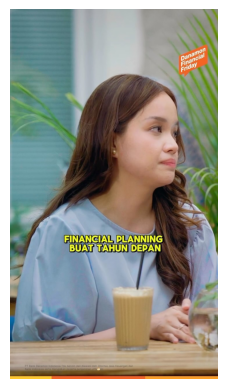

Caption: Nyicil rumah tapi bunganya malah bikin geleng-geleng🙂‍↔️ Mending take over ke KPR Danamon aja yang no kaleng-kaleng🤩

Mau tau info selengkapnya? Yuk, tonton di bdi.co.id/dff174
#Danamon #TumbuhBersamaDanamonGroup

--------------------------------------------------------------------------------

Post from 2024-11-15 12:00:22 with 946 likes:
Media Type: IMAGE


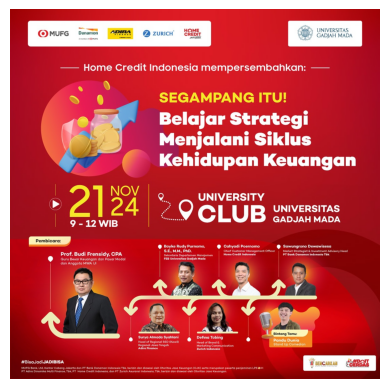

Caption: Kalo kata Aditya Sofyan, "Selalu ada sesuatu di Jogja". 

Ya betul! karena Home Credit bakal ngajak kamu seru-seruan di seminar literasi SEGAMPANG ITU! Belajar Strategi Menjalani Siklus Kehidupan Keuangan bareng speakers dan guest star yang pastinya asik! Catat jadwalnya:

📆Kamis, 21 November 2024
🕰️9-12 WIB
📍 University Club, Universitas Gadjah Mada

pssst 10 register pertama akan mendapatkan total 500K voucher belanja. Daftarin diri kamu di bit.ly/RegistSeminarLiterasiKeuangan sekarang!

#HomeCredit #SegampangItu

--------------------------------------------------------------------------------


In [172]:
# Filter rows where likes > 400
high_engagement_posts = df_post_q4[df_post_q4['Likes'] > 400]

print("\nPosts with more than 400 likes:")
print("\nNumber of high-engagement posts:", len(high_engagement_posts))
print("\nDetails of high-engagement posts:\n\n")

import requests
from io import BytesIO
from PIL import Image
for idx, row in high_engagement_posts.iterrows():
    print(f"\nPost from {row['Timestamp']} with {row['Likes']} likes:")
    print(f"Media Type: {row['media_type']}")
    
    # Fetch image from URL
    response = requests.get(row['media_url'])
    img = Image.open(BytesIO(response.content))
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
    
    print(f"Caption: {row['Caption']}\n")
    print("-"*80)

Post that gained more than 400 likes have:
- Include a clear call-to-action.
- Address trending issues such as mortgage assistance (KPR) and SME funding, as these are likely to be highly valued and seen as helpful by the public.
- Host events featuring the mention of celebrity names.
- Out of the five pieces of content, three are videos while two are images.
- On average, content is uploaded at 5 AM and 12 PM.

**Hashtags**

In [173]:
# Extract hashtags from captions of very low engagement posts
import re

def extract_hashtags(text):
    return re.findall(r'#(\w+)', text)

# Get all hashtags from very low engagement posts
hashtags = []
for caption in high_engagement_posts['Caption']:
    hashtags.extend(extract_hashtags(caption))

# Count frequency of each hashtag
from collections import Counter
hashtag_counts = Counter(hashtags)

# Display hashtag counts
print("\nHashtag usage in high engagement posts:")
for hashtag, count in hashtag_counts.most_common():
    print(f"#{hashtag}: {count} times")



Hashtag usage in high engagement posts:
#Danamon: 4 times
#TumbuhBersamaDanamonGroup: 4 times
#DanamonFinancialFriday: 2 times
#HomeCredit: 1 times
#SegampangItu: 1 times


In [174]:
# Calculate the average number of hashtags used in high engagement posts
high_engagement_posts['hashtag_count'] = high_engagement_posts['Caption'].apply(lambda x: len(extract_hashtags(x)))
average_hashtags = high_engagement_posts['hashtag_count'].mean().round(2)

print(f"Average number of hashtags used in high engagement posts: {average_hashtags}")


Average number of hashtags used in high engagement posts: 2.4


C:\Users\ADVAN\AppData\Local\Temp\ipykernel_24396\129945304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_engagement_posts['hashtag_count'] = high_engagement_posts['Caption'].apply(lambda x: len(extract_hashtags(x)))


**Overall Stats**

In [175]:
# Analyze similarities in high engagement posts

# Look at common characteristics
print("Analysis of High Engagement Posts:")
print("\nMedia Type Distribution:")
print(high_engagement_posts['media_type'].value_counts())

print("\nAverage Caption Length:", 
      high_engagement_posts['Caption'].str.len().mean().round(2), "characters")

print("\nMost Common Posting Hours:")
high_engagement_posts['Hour'] = pd.to_datetime(high_engagement_posts['Timestamp']).dt.hour
print(high_engagement_posts['Hour'].value_counts().head())

print("\nAverage Comments:", high_engagement_posts['Comments'].mean().round(2))
print("Average Owner Comments:", high_engagement_posts['owner_comments'].mean().round(2))
print("Average Customer Comments:", high_engagement_posts['customer_comments'].mean().round(2))

# Check if there are common words/phrases in captions
from collections import Counter
import re

def get_common_words(captions):
    # Combine all captions and convert to lowercase
    text = ' '.join(captions).lower()
    # Remove special characters and split into words
    words = re.findall(r'\w+', text)
    # Remove common stop words
    stop_words = {'yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'dengan', 'ini', 'itu'}
    words = [w for w in words if w not in stop_words and len(w) > 2]
    return Counter(words).most_common(10)

print("\nMost Common Words in Captions:")
common_words = get_common_words(high_engagement_posts['Caption'])
for word, count in common_words:
    print(f"{word}: {count} times")


Analysis of High Engagement Posts:

Media Type Distribution:
media_type
VIDEO    3
IMAGE    2
Name: count, dtype: int64

Average Caption Length: 462.6 characters

Most Common Posting Hours:
Hour
5     3
11    1
12    1
Name: count, dtype: int64

Average Comments: 9.0
Average Owner Comments: 4.8
Average Customer Comments: 4.2

Most Common Words in Captions:
danamon: 10 times
kamu: 6 times
tumbuhbersamadanamongroup: 4 times
produk: 3 times
yuk: 3 times
selengkapnya: 3 times
bdi: 3 times
bisnis: 3 times
keuangan: 3 times
sebesar: 3 times


C:\Users\ADVAN\AppData\Local\Temp\ipykernel_24396\1513411513.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_engagement_posts['Hour'] = pd.to_datetime(high_engagement_posts['Timestamp']).dt.hour


##### **Moderate (150 - 400 Likes)**

**Post**


Posts between 150 to 400 likes:

Number of moderate-engagement posts: 9

Details of moderate-engagement posts:



Post from 2024-10-22 13:46:30 with 164 likes:
Media Type: VIDEO


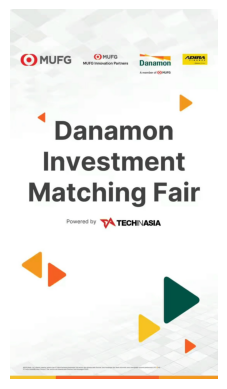

Caption: MUFG, Danamon, MUIP (MUFG Innovation Partners) dan Adira Finance mengadakan Danamon Investment Matching Fair 2024 sebagai bentuk dukungan atas pertumbuhan startup di Indonesia pada tanggal 22 Oktober 2024. Lebih dari 30 startup & Venture Capital hadir di Glass House, The Ritz-Carlton, Pacific Place. 
Selain sharing session mengenai MUIP Garuda Fund, ada juga business matching session dan networking session untuk seluruh partisipan yang hadir. 

Jangan lupa kunjungi booth Danamon untuk lebih tau mengenai MUIP Garuda Fund di Tech In Asia Conference tanggal 23-24 Oktober 2024! 

#Danamon #TumbuhBersamaDanamonGroup

--------------------------------------------------------------------------------

Post from 2024-11-09 05:18:16 with 175 likes:
Media Type: IMAGE


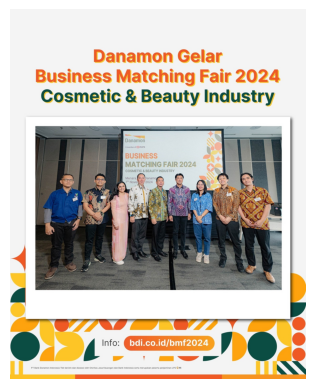

Caption: Tahun ini, Danamon kembali menggelar acara Business Matching Fair 2024 : Cosmetic & Beauty Industry pada hari Kamis, 7 November 2024 di Menara Bank Danamon, berkolaborasi dengan Tokyo SME Support Center serta didukung oleh MUFG dan MU Research and Consultant Indonesia (MURCI) dengan tujuan untuk mempertemukan nasabah dan penyedia solusi yang dapat memenuhi kebutuhan spesifik mereka di bidang kosmetik dan kecantikan, melalui beragam aktivitas seperti Seminar, Networking hingga sesi Business Matching. Kedepannya, Danamon akan terus berinovasi dengan menyelenggarakan acara Business Matching Fair di berbagai sektor industri guna mendorong pertumbuhan bisnis Nasabah.
 
Info: bdi.co.id/bmf2024
 
#Danamon #TumbuhBersamaDanamonGroup

--------------------------------------------------------------------------------

Post from 2024-11-11 11:59:39 with 316 likes:
Media Type: IMAGE


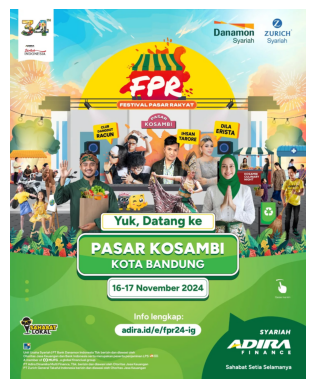

Caption: Halo Sahabat Bandung dan sekitarnya! 5 hari lagi Festival Pasar Rakyat segera hadir di kota kamu.

Acara ini adalah kolaborasi dari Adira Finance melalui Unit Usaha Syariah, Danamon Syariah, dan Zurich Syariah sebagai bentuk kepedulian untuk membuat pasar rakyat lebih sejahtera (sehat, hijau, bersih, dan terawat). FPR kali ini berbeda dengan kota-kota sebelumnya karena bertepatan dengan perayaan ulang tahun Adira Finance ke-34 yang pastinya tetap menghadirkan beragam kegiatan bermanfaat dan seru banget, yuk catat lokasi dan tanggalnya:

📍 Pasar Kosambi, Bandung
🗓️ 16-17 November 2024

Jangan sampai ketinggalan keseruannya ya! 👌

#AdiraFinance #DanamonSyariah #ZurichSyariah #FestivalPasarRakyat #SahabatPasarRakyat

--------------------------------------------------------------------------------

Post from 2024-11-22 05:01:21 with 218 likes:
Media Type: VIDEO


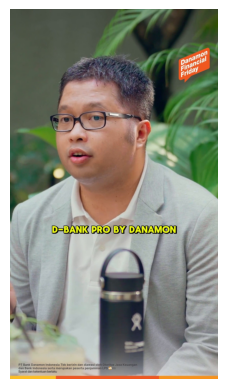

Caption: Kalau buat yang satu ini jangan takut deh! 
Kan udah ada Danamon yang bisa nemenin kamu tumbuh bersama 🥰

Apa sih emangnya yang ditakutin Dian? 
Langsung aja cek video selengkapnya di #DanamonFinancialFriday: bdi.co.id/dff174

#Danamon #TumbuhBersamaDanamonGroup

--------------------------------------------------------------------------------

Post from 2024-11-25 09:00:07 with 212 likes:
Media Type: IMAGE


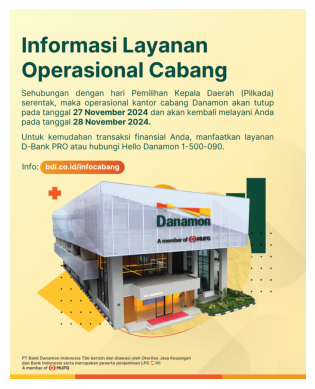

Caption: Sehubungan dengan adanya hari libur Pemilihan Kepala Daerah (Pilkada), berikut kami sampaikan informasi layanan operasional cabang Danamon.

Gunakan selalu D-Bank PRO by Danamon untuk kemudahan setiap transaksi finansialmu!

Info: bdi.co.id/infocabang

#Danamon #TumbuhBersamaDanamonGroup

--------------------------------------------------------------------------------

Post from 2024-11-27 11:02:37 with 210 likes:
Media Type: VIDEO


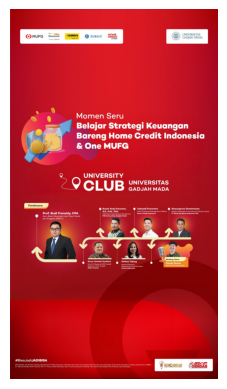

Caption: Segampang Itu Belajar Strategi Menjalani Siklus Kehidupan Keuangan!

Home Credit Indonesia dan One MUFG berkolaborasi dengan Universitas Gadjah Mada untuk mengajak para mahasiswa dan audiens umum memahami pentingnya literasi keuangan melalui seminar interaktif. Acara ini menghadirkan pembicara inspiratif dari berbagai bidang terkait, ditambah kehadiran guest star yang bikin suasana semakin seru!

Nantikan kegiatan menarik lainnya dari kami, ya!

#HomeCredit #SegampangItu

--------------------------------------------------------------------------------

Post from 2024-12-04 12:00:10 with 377 likes:
Media Type: IMAGE


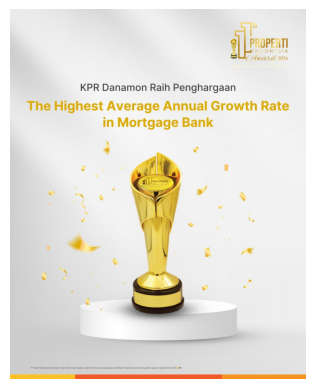

Caption: KPR Danamon Raih Penghargaan The Highest Average Annual Growth Rate in Mortgage Bank. Penghargaan ini diberikan oleh Properti Indonesia Award (PIA) 2024, ajang ke-11 yang digelar oleh Media Properti Indonesia. Hal ini menunjukkan pertumbuhan KPR Danamon yang stabil dan signifikan, juga memperkuat komitmen Danamon untuk terus berinovasi, berkolaborasi, dan menghadirkan solusi finansial menyeluruh yang mendukung pertumbuhan seluruh pemangku kepentingan agar dapat tumbuh bersama. 

#Danamon #TumbuhBersamaDanamon

--------------------------------------------------------------------------------

Post from 2024-12-05 04:00:10 with 368 likes:
Media Type: IMAGE


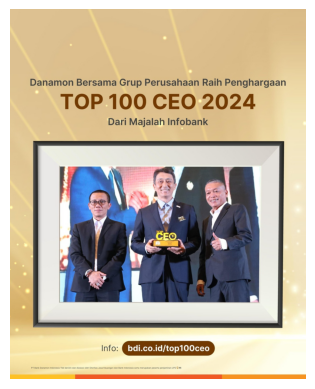

Caption: Bapak Daisuke Ejima, Direktur Utama PT Bank Danamon Indonesia Tbk, kembali terpilih sebagai salah satu Top 100 CEO 2024 versi Infobank Media! 
Tidak hanya Danamon, Bapak Kazushige Nakajima, Executive Officer & Country Head of Indonesia MUFG Bank, meraih penghargaan serupa. Tidak ketinggalan, Bapak Dewa Made Susila, Direktur Utama PT Adira Dinamika Multi Finance, Tbk. (Adira Finance), dianugerahi CEO of the Year! Selain itu, beberapa Direktur dari MUFG Bank dan Adira Finance juga menerima penghargaan Top 200 Future Leaders.
Penghargaan ini mencerminkan pertumbuhan kami sebagai bagian dari Satu Finansial Grup, yang terus menjadi mitra keuangan terpercaya dan memberikan solusi keuangan menyeluruh kepada masyarakat.

Info : bdi.co.id/top100ceo

#Danamon #TumbuhBersamaDanamon

--------------------------------------------------------------------------------

Post from 2024-12-11 12:00:09 with 164 likes:
Media Type: IMAGE


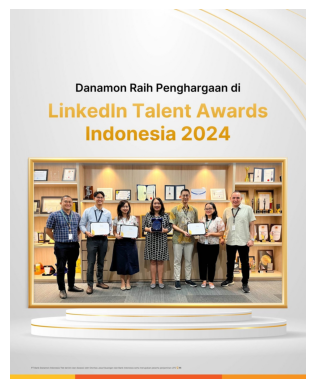

Caption: Danamon kembali raih penghargaan bergengsi pada ajang LinkedIn Talent Awards 2024 atas komitmen dalam pemanfaatan platform LinkedIn Talent Solution serta aktivitas inovatif yang dilakukan.

Atas kemampuan beradaptasi serta berinovasi, Danamon mendapatkan penghargaan sebagai The Best Talent Acquisition Team, melanjutkan prestasi yang sebelumnya diraih pada tahun 2021 dan 2022. Selain itu, Danamon juga berhasil menjadi finalis pada kategori Best Employer Brand dan Learning Champion.

Penghargaan ini merupakan bukti komitmen Danamon untuk menjadi ”The Top Employer of Choice” sekaligus menjadi mitra keuangan terpercaya bagi para Nasabah.

#Danamon #TumbuhBersamaDanamonGroup

--------------------------------------------------------------------------------


In [176]:
# Filter rows where likes > 400
moderate_engagement_posts = df_post_q4[(df_post_q4['Likes'] > 150) & (df_post_q4['Likes'] <= 400)]

print("\nPosts between 150 to 400 likes:")
print("\nNumber of moderate-engagement posts:", len(moderate_engagement_posts))
print("\nDetails of moderate-engagement posts:\n\n")

import requests
from io import BytesIO
from PIL import Image
for idx, row in moderate_engagement_posts.iterrows():
    print(f"\nPost from {row['Timestamp']} with {row['Likes']} likes:")
    print(f"Media Type: {row['media_type']}")
    
    # Fetch image from URL
    response = requests.get(row['media_url'])
    img = Image.open(BytesIO(response.content))
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
    
    print(f"Caption: {row['Caption']}\n")
    print("-"*80)

Here are the similarities among the 9 Instagram captions:

- Branding and Consistency: All captions feature Danamon branding with the hashtags #Danamon and #TumbuhBersamaDanamonGroup, highlighting efforts to build a strong and consistent brand identity.
- Collaboration with Partners: Almost all captions emphasize collaboration with startups, educational institutions, communities, or other companies, showcasing a collaborative approach in various activities.
- Enhancing Reputation: Awards mentioned in captions 7, 8, and 9 are used to strengthen Danamon's reputation as a credible and innovative financial institution.
- Utilizing Events and Activities: The captions frequently invite the audience to attend events, participate, or explore further information, encouraging direct interaction with the target audience.

**Hashtags**

In [177]:
# Extract hashtags from captions of moderate engagement posts
import re

def extract_hashtags(text):
    return re.findall(r'#(\w+)', text)

# Get all hashtags from moderate engagement posts
hashtags = []
for caption in moderate_engagement_posts['Caption']:
    hashtags.extend(extract_hashtags(caption))

# Count frequency of each hashtag
from collections import Counter
hashtag_counts = Counter(hashtags)

# Display hashtag counts
print("\nHashtag usage in moderate engagement posts:")
for hashtag, count in hashtag_counts.most_common():
    print(f"#{hashtag}: {count} times")



Hashtag usage in moderate engagement posts:
#Danamon: 7 times
#TumbuhBersamaDanamonGroup: 5 times
#TumbuhBersamaDanamon: 2 times
#AdiraFinance: 1 times
#DanamonSyariah: 1 times
#ZurichSyariah: 1 times
#FestivalPasarRakyat: 1 times
#SahabatPasarRakyat: 1 times
#DanamonFinancialFriday: 1 times
#HomeCredit: 1 times
#SegampangItu: 1 times


In [178]:
# Calculate the average number of hashtags used in moderate engagement posts
moderate_engagement_posts['hashtag_count'] = moderate_engagement_posts['Caption'].apply(lambda x: len(extract_hashtags(x)))
average_hashtags = moderate_engagement_posts['hashtag_count'].mean().round(2)

print(f"Average number of hashtags used in moderate engagement posts: {average_hashtags}")


Average number of hashtags used in moderate engagement posts: 2.44


C:\Users\ADVAN\AppData\Local\Temp\ipykernel_24396\2690063506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moderate_engagement_posts['hashtag_count'] = moderate_engagement_posts['Caption'].apply(lambda x: len(extract_hashtags(x)))


**Overall Stats**

In [179]:
# Analyze similarities in moderate engagement posts

# Look at common characteristics
print("Analysis of Moderate Engagement Posts:")
print("\nMedia Type Distribution:")
print(moderate_engagement_posts['media_type'].value_counts())

print("\nAverage Caption Length:", 
      moderate_engagement_posts['Caption'].str.len().mean().round(2), "characters")

print("\nMost Common Posting Hours:")
moderate_engagement_posts['Hour'] = pd.to_datetime(moderate_engagement_posts['Timestamp']).dt.hour
print(moderate_engagement_posts['Hour'].value_counts().head())

print("\nAverage Comments:", moderate_engagement_posts['Comments'].mean().round(2))
print("Average Owner Comments:", moderate_engagement_posts['owner_comments'].mean().round(2))
print("Average Customer Comments:", moderate_engagement_posts['customer_comments'].mean().round(2))

# Check if there are common words/phrases in captions
from collections import Counter
import re

def get_common_words(captions):
    # Combine all captions and convert to lowercase
    text = ' '.join(captions).lower()
    # Remove special characters and split into words
    words = re.findall(r'\w+', text)
    # Remove common stop words
    stop_words = {'yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'dengan', 'ini', 'itu'}
    words = [w for w in words if w not in stop_words and len(w) > 2]
    return Counter(words).most_common(10)

print("\nMost Common Words in Captions:")
common_words = get_common_words(moderate_engagement_posts['Caption'])
for word, count in common_words:
    print(f"{word}: {count} times")


Analysis of Moderate Engagement Posts:

Media Type Distribution:
media_type
IMAGE    6
VIDEO    3
Name: count, dtype: int64

Average Caption Length: 563.56 characters

Most Common Posting Hours:
Hour
5     2
11    2
12    2
13    1
9     1
Name: count, dtype: int64

Average Comments: 17.33
Average Owner Comments: 8.89
Average Customer Comments: 8.44

Most Common Words in Captions:
danamon: 26 times
2024: 9 times
penghargaan: 8 times
indonesia: 7 times
mufg: 6 times
adira: 6 times
finance: 6 times
bank: 6 times
matching: 5 times
sebagai: 5 times


C:\Users\ADVAN\AppData\Local\Temp\ipykernel_24396\3112936282.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moderate_engagement_posts['Hour'] = pd.to_datetime(moderate_engagement_posts['Timestamp']).dt.hour


##### **Low (51 - 149) to Very Low (0 - 50)**

**Post**


Posts with less than 150 likes:

Number of low posts: 88

Details of moderate-engagement posts:



Post from 2024-10-03 10:22:42 with 33 likes:
Media Type: IMAGE


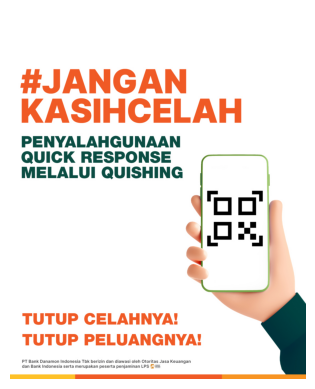

Caption: #JanganKasihCelah penyalahgunaan Quick Response (QR) melalui Quishing! 🔐

Quishing adalah salah satu kejahatan Phishing yang memanfaatkan teknologi QR. 

Yuk, pelajari cara menghindari kejahatan Quishing agar tetap aman dan tidak terkena modus penipuan.

Tutup celahnya! Tutup peluangnya!
Pelajari info modus lainnya di bdi.co.id/jangankasihcelah

#Danamon #TumbuhersamaDanamonGroup

--------------------------------------------------------------------------------

Post from 2024-10-04 10:00:11 with 42 likes:
Media Type: IMAGE


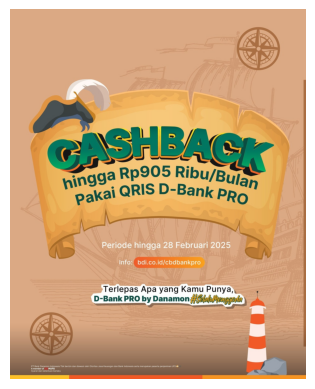

Caption: Godaan QRIS D-Bank PRO datang lagi🤩🎉

- Berbagai pilihan makanan dan minuman buat mood booster 🤤🍽️
- Belanja berbagai keperluan pribadi dan kebutuhan anabul 🛍️🐶🐱
- Buat jalan-jalan sama bestie 🚘🛵
- Bisa nonton hemat film favorit 🍿🎥

Yuk transaksi pakai QRIS D-Bank PRO!

Karena Terlepas Apa Yang Kamu Punya, D-Bank PRO by Danamon
#SelaluMenggoda

Periode program hingga 28 Februari 2025
info: bdi.co.id/cbdbankpro

#TumbuhBersamaDanamonGroup #Danamon #DBankPRO

--------------------------------------------------------------------------------

Post from 2024-10-07 06:00:10 with 42 likes:
Media Type: IMAGE


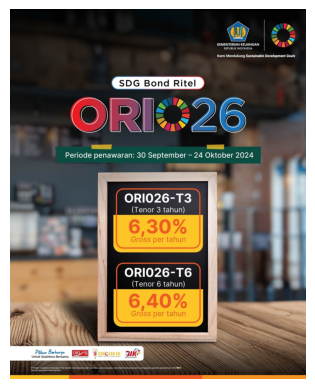

Caption: Cari passive income buat bayar arisan, token listrik atau bayar iuran sekolah anak? Investasi mulai dari Rp1 juta di  SBN Ritel Seri ORI026 dengan pilihan tenor:

• ORI026-T3 (3 tahun) dengan tingkat kupon 6,30% gross per tahun
• ORI026-T6 (6 tahun) dengan tingkat kupon 6,40% gross per tahun

Periode penawaran: 30 September - 24 Oktober 2024.
Beli via D-Bank PRO dan dapatkan Cashback hingga Rp28,5 juta!

Info: bdi.co.id/ori026
S&K berlaku.

#ORI026 #InvestasiNegeriku #PilihanBerhargaUntukSejahteraBersama #Danamon #TumbuhBersamaDanamonGroup

--------------------------------------------------------------------------------

Post from 2024-10-07 12:00:12 with 35 likes:
Media Type: IMAGE


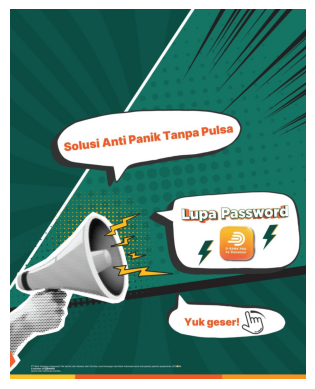

Caption: Kebiasaan pake biometric login sampe suka lupa password pas mau login D-Bank PRO kamu?
Jangan yaa dek ya….

Tenang jangan panik! Karena kamu bisa lakukan secara online dan tanpa pulsa via D-Bank PRO yang #SelaluMenggoda loh!

Yuk geser slidenya untuk ikuti petunjuknya.
Eitsss jangan lupa simpan password kamu biar gak lupa lagi ya!
Info: bdi.co.id/tutorialcpu

#DBankPRO #Danamon

--------------------------------------------------------------------------------

Post from 2024-10-09 10:00:11 with 44 likes:
Media Type: IMAGE


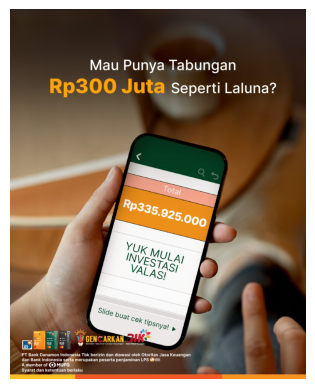

Caption: Mau punya Tabungan Rp300 juta seperti Laluna? Emang bisa?🤔

Bisa dong! Mulai investasi Valas pakai Danamon LEBIH PRO yuk! 

Investasi kamu lebih efisien dan #BanyakLebihnya karena ada 9 mata uang dalam 1 tabungan dan Rate Valasnya berani diadu!✨

Danamon LEBIH PRO juga punya fitur FX Live Rate yang buat kamu bisa pantau Rate secara langsung lewat D-Bank PRO! 

Ayo! Buka Tabungan Danamon LEBIH PRO sekarang!

Periode hingga 31 Desember 2024 
Info: bdi.co.id/dlpro 

S&K berlaku.

#Danamon #TumbuhBersamaDanamonGroup #DanamonEBIHPRO #BanyakLebihnya

--------------------------------------------------------------------------------

Post from 2024-10-10 06:00:10 with 45 likes:
Media Type: IMAGE


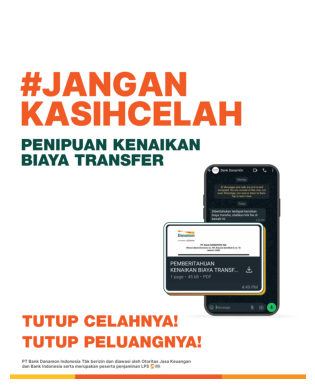

Caption: #JanganKasihCelah penipuan kenaikan biaya transfer dari nomor tidak dikenal ⚠️

Waspada jika menerima informasi perbankan dari nomor tak dikenal yang mengaku-ngaku sebagai Pihak Bank Danamon. Dapatkan informasi seputar perbankan terkini hanya dari akun resmi Bank Danamon yang terdapat di akhir slide.

Tutup celahnya! Tutup peluangnya!
Pelajari info modus lainnya di bdi.co.id/jangankasihcelah

#Danamon #TumbuhBersamaDanamonGroup

--------------------------------------------------------------------------------

Post from 2024-10-11 08:00:10 with 32 likes:
Media Type: IMAGE


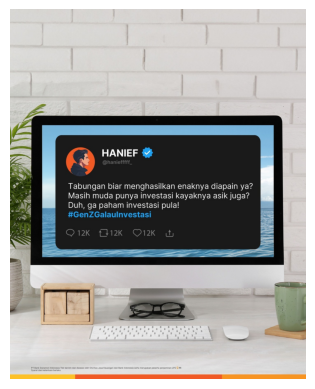

Caption: Hari gini mau investasi tapi masih galau?

Yuk ikutan diskusi bareng di Instagram Live Danamon membahas Cara Ampuh Bikin Uang Tumbuh. Catat waktunya:

🗓️ Rabu, 16 Oktober 2024
⏰ 16.00 WIB

Ada info menarik buat kamu yang penasaran sama investasi. Jangan lupa ikutan ya!

Info: bdi.co.id/ori026
#Danamon #TumbuhBersamaDanamonGroup

--------------------------------------------------------------------------------

Post from 2024-10-12 04:00:12 with 42 likes:
Media Type: IMAGE


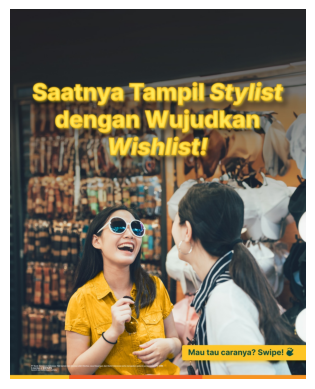

Caption: Wujudkan beragam wishlist biar tampil makin stylist! ✨
 
Tak perlu khawatir dompet menipis untuk tampil necis, karena banyak promo menarik yang bisa kamu dapetin seperti shopping voucher hingga Rp1.000.000 dan cicilan 0%.
 
Tunggu apa lagi? Kunjungi The Grand Outlet – East Jakarta, Karawang sekarang!
 
Dapatkan promonya hingga 16 Oktober 2024.
 
Cek info selengkapnya di bdi.co.id/tgo
 
#Danamon #TumbuhBersamaDanamonGroup

--------------------------------------------------------------------------------

Post from 2024-10-13 08:00:11 with 39 likes:
Media Type: IMAGE


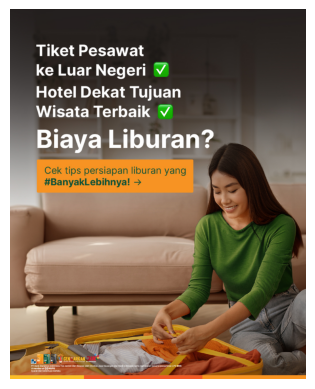

Caption: Siapa di sini yang udah punya tiket liburan ke luar negeri buat akhir tahun nanti?🙌
Udah tau belum apa aja yang perlu kamu siapin? 🤔👀

Pastikan kamu sudah buka Tabungan Danamon LEBIH PRO untuk jadi teman perjalanan liburanmu yang #BanyakLebihnya! 

Geser postingan di atas untuk cek tips persiapan liburanmu!

Periode program hingga 31 Desember 2024 
Info: bdi.co.id/dlpro 

S&K berlaku.

#Danamon #DanamonLEBIHPRO #BanyakLebihnya #TumbuhBersamaDanamonGroup

--------------------------------------------------------------------------------

Post from 2024-10-14 05:00:14 with 48 likes:
Media Type: IMAGE


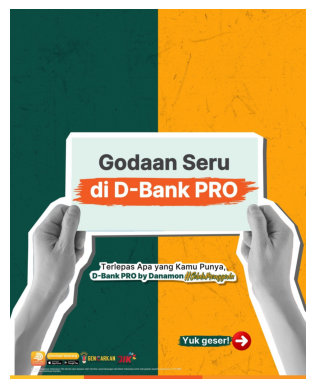

Caption: Godaan Seru di D-Bank PRO by Danamon! 😍🔥

✅ Promo cashback BPJS hingga Rp25 ribu 💰
Periode hingga 31 Desember 2024
Info: bdi.co.id/cbbpjs

✅ Promo cashback biaya admin top up e-Wallet 📱
Periode hingga 17 November 2024
Info: bdi.co.id/bbewallet

Yuk transaksi pakai D-Bank PRO #SelaluMenggoda sekarang!
#Danamon #DBankPRO #TumbuhBersamaDanamonGroup

--------------------------------------------------------------------------------


In [191]:
# Filter rows where likes > 400
low_engagement_posts = df_post_q4[(df_post_q4['Likes'] > 0) & (df_post_q4['Likes'] <= 149)]

print("\nPosts with less than 150 likes:")
print("\nNumber of low posts:", len(low_engagement_posts))
print("\nDetails of moderate-engagement posts:\n\n")
import requests
from io import BytesIO
from PIL import Image
# Filter for posts with less than 50 likes
very_low_engagement = low_engagement_posts[low_engagement_posts['Likes'] <= 50]
# Show only first 10 posts
for idx, row in very_low_engagement.head(10).iterrows():
    print(f"\nPost from {row['Timestamp']} with {row['Likes']} likes:")
    print(f"Media Type: {row['media_type']}")
    
    # Fetch image from URL
    response = requests.get(row['media_url'])
    img = Image.open(BytesIO(response.content))
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
    
    print(f"Caption: {row['Caption']}\n")
    print("-"*80)

The similarity is :

- These captions received fewer than 50 likes because they fail to capture the audience's attention with a personal storytelling approach, focus too heavily on product promotion without emotional elements or direct engagement to encourage interaction, and use hashtags that tend to be generic and less relevant for expanding audience reach beyond the existing customer base.

- Less people and video explanation

**Hashtags**

In [181]:
# Extract hashtags from captions of very low engagement posts
import re

def extract_hashtags(text):
    return re.findall(r'#(\w+)', text)

# Get all hashtags from very low engagement posts
hashtags = []
for caption in very_low_engagement['Caption']:
    hashtags.extend(extract_hashtags(caption))

# Count frequency of each hashtag
from collections import Counter
hashtag_counts = Counter(hashtags)

# Display hashtag counts
print("\nHashtag usage in very low engagement posts:")
for hashtag, count in hashtag_counts.most_common():
    print(f"#{hashtag}: {count} times")



Hashtag usage in very low engagement posts:
#Danamon: 51 times
#TumbuhBersamaDanamonGroup: 48 times
#JanganKasihCelah: 18 times
#BanyakLebihnya: 17 times
#SelaluMenggoda: 9 times
#DBankPRO: 9 times
#InvestasiNegeriku: 8 times
#DanamonLEBIHPRO: 7 times
#SemuaBisaMenang: 6 times
#MenangBerkalikali: 6 times
#ORI026: 4 times
#PilihanBerhargaUntukSejahteraBersama: 4 times
#ST013: 4 times
#PilihanBerhargaUntukMasaDepanSejahtera: 4 times
#TumbuhersamaDanamonGroup: 1 times
#DanamonEBIHPRO: 1 times
#AsuransiZurich: 1 times


In [182]:
# Calculate the average number of hashtags used in low engagement posts
low_engagement_posts['hashtag_count'] = low_engagement_posts['Caption'].apply(lambda x: len(extract_hashtags(x)))
average_hashtags = low_engagement_posts['hashtag_count'].mean().round(2)

print(f"Average number of hashtags used in very_low engagement posts: {average_hashtags}")


Average number of hashtags used in very_low engagement posts: 3.6


C:\Users\ADVAN\AppData\Local\Temp\ipykernel_24396\1132350547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_engagement_posts['hashtag_count'] = low_engagement_posts['Caption'].apply(lambda x: len(extract_hashtags(x)))


**Overall Stats**

In [183]:
# Analyze similarities in very low engagement posts

# Look at common characteristics
print("Analysis of Very Low Engagement Posts:")
print("\nMedia Type Distribution:")
print(very_low_engagement['media_type'].value_counts())

print("\nAverage Caption Length:", 
      very_low_engagement['Caption'].str.len().mean().round(2), "characters")

print("\nMost Common Posting Hours:")
very_low_engagement['Hour'] = pd.to_datetime(very_low_engagement['Timestamp']).dt.hour
print(very_low_engagement['Hour'].value_counts().head())

print("\nAverage Comments:", very_low_engagement['Comments'].mean().round(2))
print("Average Owner Comments:", very_low_engagement['owner_comments'].mean().round(2))
print("Average Customer Comments:", very_low_engagement['customer_comments'].mean().round(2))

# Check if there are common words/phrases in captions
from collections import Counter
import re

def get_common_words(captions):
    # Combine all captions and convert to lowercase
    text = ' '.join(captions).lower()
    # Remove special characters and split into words
    words = re.findall(r'\w+', text)
    # Remove common stop words
    stop_words = {'yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'dengan', 'ini', 'itu'}
    words = [w for w in words if w not in stop_words and len(w) > 2]
    return Counter(words).most_common(10)

print("\nMost Common Words in Captions:")
common_words = get_common_words(very_low_engagement['Caption'])
for word, count in common_words:
    print(f"{word}: {count} times")


Analysis of Very Low Engagement Posts:

Media Type Distribution:
media_type
IMAGE    49
VIDEO     3
Name: count, dtype: int64

Average Caption Length: 461.25 characters

Most Common Posting Hours:
Hour
5     12
10     7
6      7
3      7
9      6
Name: count, dtype: int64

Average Comments: 5.5
Average Owner Comments: 2.9
Average Customer Comments: 2.6

Most Common Words in Captions:
danamon: 128 times
pro: 55 times
bdi: 54 times
tumbuhbersamadanamongroup: 48 times
info: 46 times
bank: 38 times
hingga: 34 times
jangankasihcelah: 29 times
2024: 29 times
lebih: 29 times


C:\Users\ADVAN\AppData\Local\Temp\ipykernel_24396\2979406622.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  very_low_engagement['Hour'] = pd.to_datetime(very_low_engagement['Timestamp']).dt.hour


## **Conclusions**

**Engagement & Metrics on Q4**
- Engagement in Q4 performed poorly compared to the other three quarters, accounting for only 8% of total engagement.
- The total number of posts in Q4 was 102, with 82 being images and 20 being videos.
- Likes median is 48.50
- Customer Comments median is 2.5
- Media Type metrics:
    + Image median median:
        + Likes 44 
        + Customer Comments 2
    + Video Content Metrics:
        + Likes 82.5
        + Customer comments 3 

**Correlations**
- Comments and Likes on Q4 has very weak correlation with correlation score is 0.147.

**Considered High Engagement Post on Q4**
- Total Likes is more than 400
- Most liked post is post from 2024-11-15 12:00:22 with 946 like, the post is about Seminar.
- Address trending issues such as mortgage assistance (KPR) and SME funding, as these are likely to be highly valued and seen as helpful by the public.
- Host events featuring the mention of celebrity names.
- Include a clear call-to-action.
- Most media type is Video.
- Average Caption Length 461 characters
- Most Common Posting Hours:
    + around 05.00 = 3
    + around 12.00 = 2
- Average Customer Comments: 4.2.
- Average number of hashtags used in high engagement posts: 2.4

**Considered Moderate Engagement Post on Q4**
- Total Likes 150 - 400
- Enhancing Reputation: Awards mentioned in captions 7, 8, and 9 are used to strengthen Danamon's reputation as a credible and innovative financial institution.
- Average Customer Comments: 8.44
- Average Caption Length: 563.56 characters
- Most Common Posting Hours:
    + around 05.00 = 2
    + around 11.00 = 2
    + around 12.00 = 2
    + around 13.00 = 1
    + around 09.00 = 1
- Posting hours doesn't consistent
- Average Customer Comments: 8.44.
- Average number of hashtags used in moderate engagement posts: 2.44

**Considered Low Engagement Post on Q4**
- Total Likes is less than 150
- captions received fewer than 50 likes because they fail to capture the audience's attention with a personal storytelling approach, focus too heavily on product promotion without emotional elements or direct engagement to encourage interaction, and use hashtags that tend to be generic and less relevant for expanding audience reach beyond the existing customer base.
- Most Common Posting Hours on Very Low Likes (less than 50):
    + around 05.00 = 12
    + around 10.00 = 7
    + around 06.00 = 7
    + around 03.00 = 7
    + around 09.00 = 6
- Incosistent Posting hours.
- Average Customer Comments: 2.6
- Average number of hashtags used in very_low engagement posts: 3.6

**Overall**
- Videos always gained more engagement than Image on every quarter

## **Reccomendations**

- Add more video content for higher engagement, especially in Q4, make it even 1:2 with Images content.
- Promote high-value content like seminars, events, mortgage assistance (KPR), and SME funding or Provide solutions for customers looking to own a vehicle, whether for personal or professional needs, with competitive financing options (based on Danamon features on https://www.danamon.co.id/id/Personal/KartuTransaksi)
- Use targeted hashtags (2-3 per post) to optimize reach
- Consider using these these hashtags:
    + #kpr (has 1.6 millions reach based on BrandMentions.com for last 7 days)
    + #dukungumkm (has 115k reach based on BrandMentions.com for last 7 days)
    + #pinjamanmudah (has 108k reach based on BrandMentions.com for last 7 days)
    + #danacepat (has 21.2k reach based on BrandMentions.com for last 7 days)
    + #tanpajaminan (has 13k reach based on BrandMentions..com for last 7 days)
- Focus on proven posting hours (05:00 and 12:00) and establish a consistent posting schedule.
- Keep captions concise (400-500 characters) while including storytelling, trending topics, and CTAs.
- Collaboration in Danamon Post. To enhance engagement and audience reach, Danamon can leverage collaborative content strategies by partnering with relevant stakeholders and influencers. 
    + List of financial influencers based on https://www.ice.id/article/influencer/influencer-finansial-di-indonesia :
        - Felicia Putri Tjiasaka
        - Prita Hapsari Ghozie
        - Raymond Surya Chin
        - Raditya Dika
        - Andika Diskartes